In [1]:
import matplotlib
import matplotlib.pyplot as plt
import pysam
import pandas as pd
import numpy as np
import os
import collections
import ast
from pygenomeviz import GenomeViz

# Import DataFrames

In [2]:
drbList = []
for file in os.listdir('/home/mark/Desktop/HLA/DRB/DataFrames/full/'):
    print(file)
    tempDF = pd.read_csv('/home/mark/Desktop/HLA/DRB/DataFrames/full/'+str(file))
    for row in tempDF.index:
        drbList.append([x for x in tempDF.loc[row]])

NA20847.hap2.csv
HG00358.hap2.csv
HG02953.hap2.csv
HG02554.hap2.csv
HG01114.hap2.csv
HG02059.hap1.csv
HG00514.hap1.csv
HG01596.hap1.csv
NA18939.hap2.csv
NA19129.hap1.csv
NA19331.hap1.csv
HG03065.hap2.csv
NA19705.hap1.csv
HG03456.hap2.csv
HG00358.hap1.csv
NA19317.hap1.csv
HG03807.hap1.csv
NA19240.hap1.csv
HG03371.hap2.csv
HG01573.hap1.csv
HG02769.hap1.csv
NA18989.hap1.csv
HG00096.hap1.csv
HG01596.hap2.csv
HG00512.hap2.csv
HG04036.hap1.csv
NA20509.hap2.csv
NA12329.hap1.csv
HG02587.hap1.csv
NA18989.hap2.csv
NA19239.hap1.csv
HG03732.hap2.csv
hg38.hap6.csv
HG01114.hap1.csv
HG04217.hap1.csv
NA24385.hap1.csv
HG02769.hap2.csv
HG02011.hap1.csv
HG04217.hap2.csv
chm13.hap1.csv
NA19384.hap2.csv
HG03248.hap1.csv
NA19036.hap2.csv
HG00864.hap1.csv
HG03520.hap1.csv
NA19836.hap1.csv
HG03009.hap1.csv
HG00514.hap2.csv
HG02059.hap2.csv
NA19650.hap2.csv
NA20355.hap1.csv
NA20847.hap1.csv
HG01352.hap1.csv
HG02106.hap1.csv
HG02666.hap2.csv
HG02953.hap1.csv
HG03683.hap2.csv
NA19347.hap2.csv
NA18534.hap1.csv
HG

In [3]:
DRB_DF1 = pd.DataFrame(data=drbList)

In [4]:
DRB_DF1

0      1     2     3    4             5   \
0        NA20847.hap2_4318694_MIRb   42.0  33.3   6.1  0.0  NA20847.hap2   
1       NA20847.hap2_4319056_AluSc  327.0   8.8   0.3  0.0  NA20847.hap2   
2        NA20847.hap2_4319558_AluY  343.0   5.8   0.0  2.3  NA20847.hap2   
3       NA20847.hap2_4319880_L1MC2  668.0  18.3   4.0  0.7  NA20847.hap2   
4       NA20847.hap2_4320739_L1MD2  439.0  21.0  11.8  2.7  NA20847.hap2   
...                            ...    ...   ...   ...  ...           ...   
48516  NA12329.hap2_4585462_AluSg7  217.0   8.7  19.5  0.7  NA12329.hap2   
48517     NA12329.hap2_4586217_MIR   43.0  32.0   1.0  0.0  NA12329.hap2   
48518  NA12329.hap2_4586402_MER90a   69.0  21.1   2.3  0.0  NA12329.hap2   
48519  NA12329.hap2_4586530_MLT2C1  225.0  23.4   4.5  6.1  NA12329.hap2   
48520  NA12329.hap2_4586917_MER90a  317.0  22.3   2.6  2.4  NA12329.hap2   

            6        7          8  9       10        11     12      13     14  \
0      4318694  4318891  (1781957)  +    MIRb  SINE/MIR     10   219.0   (49)   
1      4319056  4319352  (1781496)  +   AluSc  SINE/Alu      1   298.0   (11)   
2      4319558  4319870  (1780978)  +    AluY  SINE/Alu      1   306.0    (5)   
3      4319880  4320719  (1780129)  C   L1MC2   LINE/L1   (10)  6334.0   5467   
4      4320739  4321444  (1779404)  C   L1MD2   LINE/L1   (15)  6344.0   5577   
...        ...      ...        ... ..     ...       ...    ...     ...    ...   
48516  4585462  4585702  (1533005)  +  AluSg7  SINE/Alu     12   297.0   (12)   
48517  4586217  4586313  (1532394)  +     MIR  SINE/MIR     58   155.0  (107)   
48518  4586402  4586529  (1532178)  C  MER90a  LTR/ERV1    (2)   612.0    482   
48519  4586530  4586911  (1531796)  C  MLT2C1  LTR/ERVL   (18)   379.0      4   
48520  4586917  4587380  (1531327)  C  MER90a  LTR/ERV1  (140)   474.0     10   

           15       16      17   18   19  
0      7116.0  4318206     488  NaN  NaN  
1      7117.0  4318206     850  NaN  NaN  
2      7118.0  4318206    1352  NaN  NaN  
3      7119.0  4318206    1674  NaN  NaN  
4      7120.0  4318206    2533  NaN  NaN  
...       ...      ...     ...  ...  ...  
48516  7539.0  4309952  275510  NaN  NaN  
48517  7540.0  4309952  276265  NaN  NaN  
48518  7541.0  4309952  276450  NaN  NaN  
48519  7542.0  4309952  276578  NaN  NaN  
48520  7541.0  4309952  276965  NaN  NaN  

[48521 rows x 20 columns]

In [5]:
import ast
goodRows =[]
for row in DRB_DF1.index:
    if 'DRB' in str(DRB_DF1.at[row,18]):
        goodRows.append(row)
        DRB_DF1.at[row,11] = ast.literal_eval(DRB_DF1.at[row,18]).strip()
        if '+' in str(DRB_DF1.at[row,9]):
            DRB_DF1.at[row,10] = str(ast.literal_eval(DRB_DF1.at[row,18]).strip())+"->_"+str(ast.literal_eval(DRB_DF1.at[row,19]).strip())
        else:
            DRB_DF1.at[row,10] = "<-"+str(ast.literal_eval(DRB_DF1.at[row,18]).strip())+"_"+str(ast.literal_eval(DRB_DF1.at[row,19]).strip())

    else:
        if DRB_DF1.at[row,2]<=50.0:
            goodRows.append(row)
        else:
            continue
DRB_DF2=DRB_DF1.loc[goodRows].copy()

In [6]:
pDF1 = pd.read_csv('/home/mark/Desktop/HLA/DRB/DRB_PseudoGene_RM_ReWork2024-03-27-2024.csv').drop(columns=['Unnamed: 0'])
for row in pDF1.index:
    if pDF1.at[row,'8']=='HLA-DRB6-202_lncR_EXON_6':
        pDF1.at[row,'14']='Gene'
    else:
        continue
pDF  = pDF1[pDF1['14']=='Gene'].copy()

In [7]:
pDF

0    1    2    3             4        5        6  7  \
0     41136  0.0  0.0  0.0  HG00512.hap1  4281494  4281760  C   
1     41137  0.0  0.0  0.0  HG00512.hap1  4295101  4295176  C   
2     41457  0.0  0.0  0.0  HG02282.hap2  4392244  4392292  C   
3     41458  0.0  0.0  0.0  HG02282.hap2  4392744  4392854  C   
4     41459  0.0  0.0  0.0  HG02282.hap2  4393604  4393865  C   
...     ...  ...  ...  ...           ...      ...      ... ..   
1135  42154  2.7  0.0  0.0  NA21487.hap1  4511747  4511857  C   
1136  42155  0.3  0.0  0.0  NA21487.hap1  4512556  4512837  C   
1137  42177  0.8  0.0  0.0  NA21487.hap1  4387319  4387585  C   
1138  42178  2.7  0.0  0.0  NA21487.hap1  4400902  4400976  C   
1139  42179  2.6  0.0  0.0  NA21487.hap1  4413207  4413282  C   

                                 8  9   10  11            12        13    14  \
0           HLA-DRB9-201_UP_EXON_2  0  267   1  HLA-DRB9-201  0.996255  Gene   
1           HLA-DRB9-201_UP_EXON_1  0   76   1  HLA-DRB9-201  0.986842  Gene   
2     HLA-DRB2-201_UP_IN-25_EXON_4  0   49   1  HLA-DRB2-201  0.979592  Gene   
3           HLA-DRB2-201_UP_EXON_3  0  111   1  HLA-DRB2-201  0.990991  Gene   
4           HLA-DRB2-201_UP_EXON_2  0  262   1  HLA-DRB2-201  0.996183  Gene   
...                            ... ..  ...  ..           ...       ...   ...   
1135        HLA-DRB8-201_UP_EXON_2  0  111   1  HLA-DRB8-201  0.990991  Gene   
1136        HLA-DRB8-201_UP_EXON_1  0  282   1  HLA-DRB8-201  0.996454  Gene   
1137        HLA-DRB9-201_UP_EXON_2  0  267   1  HLA-DRB9-201  0.996255  Gene   
1138        HLA-DRB9-201_UP_EXON_1  1   75   1  HLA-DRB9-201  0.973684  Gene   
1139        HLA-DRB9-201_UP_EXON_1  0   76   1  HLA-DRB9-201  0.986842  Gene   

            15  
0     HLA-DRB9  
1     HLA-DRB9  
2     HLA-DRB2  
3     HLA-DRB2  
4     HLA-DRB2  
...        ...  
1135  HLA-DRB8  
1136  HLA-DRB8  
1137  HLA-DRB9  
1138  HLA-DRB9  
1139  HLA-DRB9  

[1067 rows x 16 columns]

In [8]:
mydrbList=[]
for row in DRB_DF2.index:
    mydrbList.append([x for x in DRB_DF2.loc[row]])
    
for row in pDF.index:
    row0 = 'placeholder'
    row1 = 'placeholder1'
    row2 = pDF.at[row,'1']
    row3 = pDF.at[row,'2']
    row4 = pDF.at[row,'3']
    row5 = pDF.at[row,'4']
    row6 = pDF.at[row,'5']
    row7 = pDF.at[row,'6']
    row8 = 'placeholder'
    if pDF.at[row,'7'] =='C':
        row9='-'
        row10 = '<-HLA-'+str(pDF.at[row,'8'].split("-")[1])+'_'+str(pDF.at[row,'8'].split("_")[-1])
    else:
        row9='+'
        row10 = 'HLA-'+str(pDF.at[row,'8'].split("-")[1])+'_'+str(pDF.at[row,'8'].split("_")[-1])+"->"
        
        
    row11 = 'HLA-'+str(pDF.at[row,'8'].split("-")[1])
    row12 = 'placeholder'
    row13 = 'placeholder'
    row14 = 'placeholder'
    row15 = 'placeholder'

    mydrbList.append([row0,row1,row2,row3,row4,row5,row6,row7,row8,row9,row10,row11,row12,row13,row14,row15,row14,row14,row14,row14])

In [9]:
DRB_DF = pd.DataFrame(data=mydrbList).sort_values(by=[6,5])
DRB_DF

0      1     2     3    4             5   \
39654       hg38.hap8_3668839_MIRb   42.0  33.3   6.1  0.0     hg38.hap8   
39655      hg38.hap8_3669201_AluSc  327.0   8.8   0.3  0.0     hg38.hap8   
39656       hg38.hap8_3669703_AluY  344.0   5.7   0.0  2.3     hg38.hap8   
39657      hg38.hap8_3670019_L1MC2  669.0  18.2   4.0  1.6     hg38.hap8   
39658      hg38.hap8_3670891_L1MD2  440.0  21.0  11.8  2.7     hg38.hap8   
...                            ...    ...   ...   ...  ...           ...   
35324  HG03248.hap2_4689492_AluSg7  217.0   8.7  19.5  0.7  HG03248.hap2   
35325     HG03248.hap2_4690247_MIR   43.0  32.0   1.0  0.0  HG03248.hap2   
35326  HG03248.hap2_4690432_MER90a   69.0  21.1   2.3  0.0  HG03248.hap2   
35327  HG03248.hap2_4690560_MLT2C1  225.0  23.4   4.5  6.1  HG03248.hap2   
35328  HG03248.hap2_4690947_MER90a  317.0  22.3   2.6  2.4  HG03248.hap2   

            6        7          8  9       10        11     12      13     14  \
39654  3668839  3669036   (937352)  +    MIRb  SINE/MIR     10   219.0   (49)   
39655  3669201  3669497   (936891)  +   AluSc  SINE/Alu      1   298.0   (11)   
39656  3669703  3670016   (936372)  +    AluY  SINE/Alu      1   307.0    (4)   
39657  3670019  3670871   (935517)  C   L1MC2   LINE/L1    (5)  6339.0   5467   
39658  3670891  3671596   (934792)  C   L1MD2   LINE/L1   (15)  6344.0   5577   
...        ...      ...        ... ..     ...       ...    ...     ...    ...   
35324  4689492  4689732  (1549881)  +  AluSg7  SINE/Alu     12   297.0   (12)   
35325  4690247  4690343  (1549270)  +     MIR  SINE/MIR     58   155.0  (107)   
35326  4690432  4690559  (1549054)  C  MER90a  LTR/ERV1    (2)   612.0    482   
35327  4690560  4690941  (1548672)  C  MLT2C1  LTR/ERVL   (18)   379.0      4   
35328  4690947  4691410  (1548203)  C  MER90a  LTR/ERV1  (140)   474.0     10   

           15       16      17   18   19  
39654  5719.0  3668351     488  NaN  NaN  
39655  5720.0  3668351     850  NaN  NaN  
39656  5721.0  3668351    1352  NaN  NaN  
39657  5722.0  3668351    1668  NaN  NaN  
39658  5723.0  3668351    2540  NaN  NaN  
...       ...      ...     ...  ...  ...  
35324  7697.0  4411787  277705  NaN  NaN  
35325  7698.0  4411787  278460  NaN  NaN  
35326  7699.0  4411787  278645  NaN  NaN  
35327  7700.0  4411787  278773  NaN  NaN  
35328  7699.0  4411787  279160  NaN  NaN  

[49588 rows x 20 columns]

In [10]:
countDict={}
for sample in set(DRB_DF[5]):
    if 'chm13' in sample or 'hg38' in sample:
        continue
    else:
        tempCountDF = DRB_DF[DRB_DF[5]==sample].copy()
        tempList = sorted([y for y in set([ast.literal_eval(x) for x in tempCountDF[18] if 'DRB' in str(x)])])
        if '_'.join(tempList) in countDict.keys():
            countDict['_'.join(tempList)]+=1
        else:
            countDict['_'.join(tempList)]=1

In [11]:
countDict

{'HLA-DRB1_HLA-DRB3': 58,
 'HLA-DRB1_HLA-DRB4': 33,
 'HLA-DRB1': 21,
 'HLA-DRB1_HLA-DRB5': 18}

In [12]:
#DRB_DF.to_csv("/home/mark/Desktop/HLA/DRB/DRB_wPseudo_50percent.csv")
#DRB_DF.to_csv("/home/mark/Desktop/HLA/DRB/DRB_wPseudo_20percent.csv")
#DRB_DF.to_csv("/home/mark/Desktop/HLA/DRB/DRB_wPseudo_10percent.csv")
#DRB_DF.to_csv("/home/mark/Desktop/HLA/DRB/DRB_wPseudo_5percent.csv")

# Start Visualization

In [13]:
ColorDict = {
 'HLA-DRB2':'cyan',
 'HLA-DRB6':'cyan',
 'HLA-DRB7':'cyan',
 'HLA-DRB8':'cyan',
 'HLA-DRB9':'cyan',  
 'HLA-DRB1':'Magenta',
 'HLA-DRB3':'Magenta',
 'HLA-DRB4':'Magenta',
 'HLA-DRB5':'Magenta',
 'DNA/TcMar-Mariner':'blue',
 'DNA/TcMar-Tigger':'blue',
 'DNA/hAT-Blackjack':'blue',
 'DNA/hAT-Charlie':'blue',
 'DNA/hAT-Tip100':'blue',
 'LINE/CR1':'darkgreen',
 'LINE/L2':'green',
 'LINE/L1':'lime',
 'LTR/ERVK':'orange',
 'LTR/ERV1':'orange',
 'LTR/ERVL':'orange',
 'LTR/ERVL-MaLR':'orange',
 'Low_complexity':'brown',
 'Retroposon/SVA':'yellow',
 'SINE/MIR':'darkred',
 'SINE/Alu':'red',
 'snRNA':'silver',
 'Simple_repeat':"brown",
 
}

In [14]:
DRB_DF['Color']=[ColorDict[x] for x in DRB_DF[11]]

In [15]:
DRB_DF['Insertion_Distance']='temp'

for sample in set([x for x in DRB_DF[5]]):
    tempDF = DRB_DF[DRB_DF[5]==sample].copy()
    tempDF[6]= tempDF[6].astype(int)
    tempDF[7]= tempDF[7].astype(int)
    start = int(min(tempDF[6]))
    
    for row in tempDF.index:
        DRB_DF.at[row,'Insertion_Distance']= (int(tempDF.at[row,6])-start)+10

In [16]:
lengths=[]
for row in DRB_DF.index:
    lengths.append((int(DRB_DF.at[row,7]) - int(DRB_DF.at[row,6]))+1)
DRB_DF['Length']= lengths

In [16]:
#for haplotype in set(DRB_DF[5]):
#    tempDF = DRB_DF[DRB_DF[5]==haplotype].copy()
#    tempDF.to_csv('/home/mark/Desktop/HLA/DRB/DataFrames/percent_50/'+str(haplotype)+"_50_percent.csv")

In [88]:
genome_list = {}
for sample in set(DRB_DF[5]):
    
    tempDF = DRB_DF[DRB_DF[5]==sample].copy()
    tempDF[6]= tempDF[6].astype(int)
    tempDF[7]= tempDF[7].astype(int)

    size = abs(min(tempDF[6])-max(tempDF[7]))

    genome_list[sample]={'name':sample, 'size':size+20, 'cds_list':[]}
    
    for item in tempDF.index:
        start = int(tempDF.at[item,'Insertion_Distance'])
        end = int(tempDF.at[item,'Insertion_Distance'])+int(tempDF.at[item,'Length'])
        if tempDF.at[item,9] == '+':
            strand = 1
        else:
            strand = -1
        genome_list[sample]['cds_list'].append([start, end, strand, str(tempDF.at[item,10]), str(str(tempDF.at[item,'Color']))])

In [89]:
genome_list['HG01890.hap1']

{'name': 'HG01890.hap1',
 'size': 190186,
 'cds_list': [[10, 208, 1, 'MIRb', 'darkred'],
  [372, 670, 1, 'AluSc', 'red'],
  [876, 1190, 1, 'AluY', 'red'],
  [1199, 2039, -1, 'L1MC2', 'lime'],
  [2058, 2762, -1, 'L1MD2', 'lime'],
  [2764, 2865, 1, 'AluJr', 'red'],
  [2866, 3159, -1, 'AluSc', 'red'],
  [3159, 3343, 1, 'AluJr', 'red'],
  [3348, 3819, 1, 'GA-rich', 'brown'],
  [3820, 3895, -1, 'L1PREC2', 'lime'],
  [3897, 4206, -1, 'AluSx3', 'red'],
  [4206, 6301, -1, 'L1PREC2', 'lime'],
  [6301, 6655, 1, 'THE1B', 'orange'],
  [6656, 7247, 1, 'THE1B', 'orange'],
  [7249, 7540, -1, 'AluY', 'red'],
  [7540, 8518, 1, 'THE1B', 'orange'],
  [8518, 8875, 1, 'THE1B', 'orange'],
  [8888, 9461, 1, 'L1PA15', 'lime'],
  [9462, 9739, 1, 'AluSc', 'red'],
  [9743, 9889, 1, 'L1PA15', 'lime'],
  [9891, 10056, -1, 'AluSc8', 'red'],
  [10056, 10082, 1, '(T)n', 'brown'],
  [10082, 10200, -1, 'AluSc8', 'red'],
  [10200, 11337, 1, 'L1PA15', 'lime'],
  [11337, 11765, 1, 'MER83', 'orange'],
  [11765, 12370, 1, '

In [90]:
import json
def js_r(filename: str):
    with open(filename) as f_in:
        return json.load(f_in)
my_sample_data = js_r('/home/mark/Desktop/HLA/Globus/sample_hap_HLA_Sequence_Dictionary.json')
sampleList = ['chm13.hap1','hg38.hap1']
for x in my_sample_data.keys():
    if 'unassigned' in x:
        continue
    else:
        sampleList.append(str(x.split(".")[0])+".hap"+str(x.split("hap")[1].split(".")[0]))
sampleList2 = sorted(sampleList)
metaData = pd.read_csv('/home/mark/Desktop/HLA/Globus/hgsvc_samples.tsv', sep='\t')
metaData.sort_values(by=['population'])
sampleList3 = ['chm13.hap1','hg38.hap1']
for x in metaData.sort_values(by=['population'])['sample']:
    if str(x)+".hap1" in sampleList2:
        sampleList3.append(str(x)+".hap1")
        sampleList3.append(str(x)+".hap2")
    else:
        continue

In [91]:
sampleList3

['chm13.hap1',
 'hg38.hap1',
 'HG01890.hap1',
 'HG01890.hap2',
 'HG02554.hap1',
 'HG02554.hap2',
 'HG02011.hap1',
 'HG02011.hap2',
 'HG02282.hap1',
 'HG02282.hap2',
 'NA24385.hap1',
 'NA24385.hap2',
 'NA19705.hap1',
 'NA19705.hap2',
 'NA19983.hap1',
 'NA19983.hap2',
 'NA20355.hap1',
 'NA20355.hap2',
 'NA19836.hap1',
 'NA19836.hap2',
 'HG03009.hap1',
 'HG03009.hap2',
 'HG03807.hap1',
 'HG03807.hap2',
 'HG00864.hap1',
 'HG00864.hap2',
 'NA12329.hap1',
 'NA12329.hap2',
 'NA18534.hap1',
 'NA18534.hap2',
 'HG00514.hap1',
 'HG00514.hap2',
 'HG00513.hap1',
 'HG00513.hap2',
 'HG00512.hap1',
 'HG00512.hap2',
 'HG01352.hap1',
 'HG01352.hap2',
 'HG01457.hap1',
 'HG01457.hap2',
 'HG01114.hap1',
 'HG01114.hap2',
 'HG03520.hap1',
 'HG03520.hap2',
 'HG03371.hap1',
 'HG03371.hap2',
 'HG02953.hap1',
 'HG02953.hap2',
 'HG00268.hap1',
 'HG00268.hap2',
 'HG00358.hap1',
 'HG00358.hap2',
 'HG00171.hap1',
 'HG00171.hap2',
 'HG00096.hap1',
 'HG00096.hap2',
 'NA20847.hap1',
 'NA20847.hap2',
 'HG02769.hap1',
 '

In [92]:
#I removed these because NNNNNNNNs where in this region
sampleList3.remove('NA18939.hap1')
sampleList3.remove('NA18939.hap2')

In [93]:
print(len(sampleList3))

130


In [94]:
ColorDict

{'AFR': '#ffcd33',
 'AFRAMR': '#ff9900',
 'AMR': '#ff3c3c',
 'EAS': '#acff33',
 'EUR': '#63ebff',
 'SAS': '#ff2fff'}

In [95]:
from matplotlib.lines import Line2D
from matplotlib.patches import Patch

gv = GenomeViz(tick_style="axis")

for genome in sampleList3:
    name, size, cds_list = genome_list[genome]["name"], genome_list[genome]["size"], genome_list[genome]["cds_list"]
    track = gv.add_feature_track(name, size)
    
    flag=1
    for idx, cds in enumerate(cds_list, 1):
        start, end, strand, mylabel, color  = cds
        
        if 'HLA' in str(mylabel) and '_1' in str(mylabel):
            track.add_feature(start, end, strand, label='←\n'+str(mylabel.split("HLA-")[1].split("_")[0]),facecolor=color,labelrotation=0, plotstyle="box", labelvpos="top", labelhpos="left", labelha="left")
        else:
            track.add_feature(start, end, strand, facecolor=color,labelrotation=0, plotstyle="box", labelvpos="top", labelhpos="center", labelha="center")
                
# Add Legends 
handles =[]
for color in ColorDict.keys():
    if 'HLA' in str(color):
        handles.append(Line2D([], [], marker=">", color=ColorDict[color], label=str(color)+"-Exon", ms=10, ls="none"))
    else:
        handles.append(Line2D([], [], marker=">", color=ColorDict[color], label=color, ms=10, ls="none"))

fig = gv.plotfig()
fig.subplots_adjust(wspace=0, hspace=1)
fig.legend(handles=handles, bbox_to_anchor=(1, 1))
fig.savefig("/home/mark/Desktop/HLA/DRB/Figures/Manuscript/DRB_Genome_50_percent_wPseudoGenes.svg")
fig.savefig("/home/mark/Desktop/HLA/DRB/Figures/Manuscript/DRB_Genome_50_percent_wPseudoGenes.pdf")
fig.savefig("/home/mark/Desktop/HLA/DRB/Figures/Manuscript/DRB_Genome_50_percent_wPseudoGenes.jpeg")

In [29]:
randomSamples=['HG02011.hap1', 'NA19983.hap2', 'HG02554.hap1', 'HG01890.hap2', 'HG00512.hap1']

In [30]:
randomSamplesDict={'HG02011.hap1':'DR4/7/9', 'NA19983.hap2':'DR1', 'HG02554.hap1':'DR2', 'HG01890.hap2':'DR3/5/6', 'HG00512.hap1':'DR8'}

In [31]:
from pygenomeviz import GenomeViz
from dna_features_viewer import GraphicFeature, GraphicRecord

In [32]:
colorDict={'HLA-DRB1':'#3B5BA5',
 'HLA-DRB2':'#BBCB50',
 'HLA-DRB3':'#F3B941',
 'HLA-DRB4':'#F9EC7E',
 'HLA-DRB5':'#678CEC',
 'HLA-DRB6':'#D49BAE',
 'HLA-DRB7':'#E3CCB2',
 'HLA-DRB8':'#E26274',
 'HLA-DRB9':'#E87A5D'}

In [109]:
collections.Counter([x.split(".")[0] for x in set(DRB_DF[5])])

Counter({'hg38': 6,
         'NA19036': 2,
         'HG02769': 2,
         'HG02059': 2,
         'HG02282': 2,
         'HG03248': 2,
         'NA19240': 2,
         'HG01114': 2,
         'HG00513': 2,
         'HG01457': 2,
         'HG00731': 2,
         'HG00732': 2,
         'HG03452': 2,
         'HG00733': 2,
         'NA19238': 2,
         'HG01505': 2,
         'NA12329': 2,
         'HG03456': 2,
         'NA19384': 2,
         'NA18939': 2,
         'HG02018': 2,
         'HG03732': 2,
         'NA19239': 2,
         'HG02492': 2,
         'NA19705': 2,
         'HG00512': 2,
         'NA19317': 2,
         'NA19983': 2,
         'HG02011': 2,
         'NA21487': 2,
         'HG00096': 2,
         'NA19434': 2,
         'NA24385': 2,
         'NA18989': 2,
         'HG03807': 2,
         'NA19347': 2,
         'HG03009': 2,
         'NA20355': 2,
         'HG02106': 2,
         'HG01596': 2,
         'HG02587': 2,
         'HG01573': 2,
         'HG02666': 2,
         'HG01

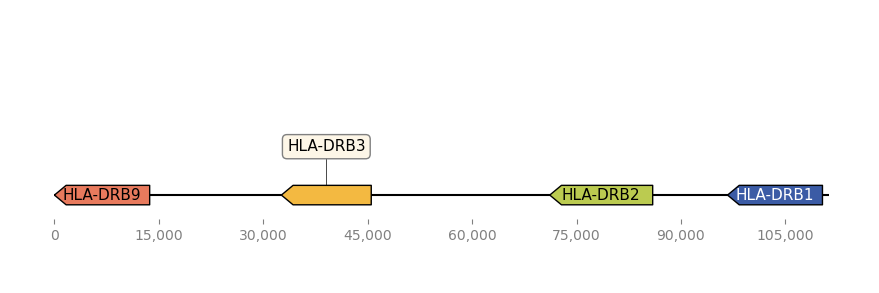

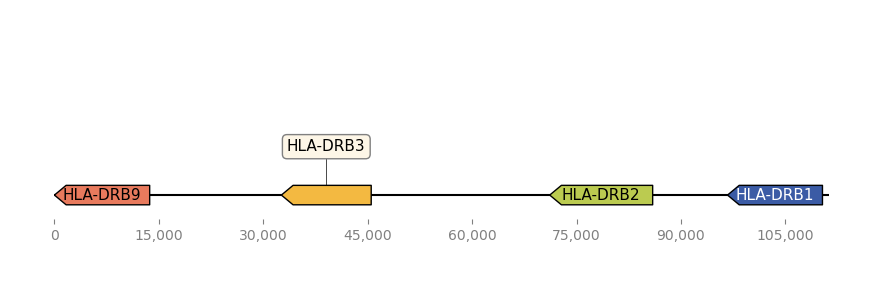

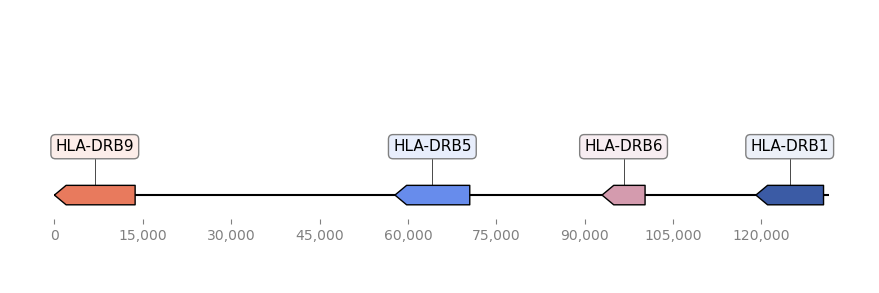

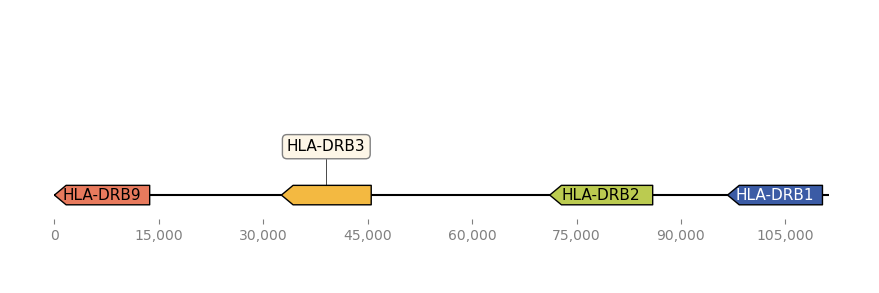

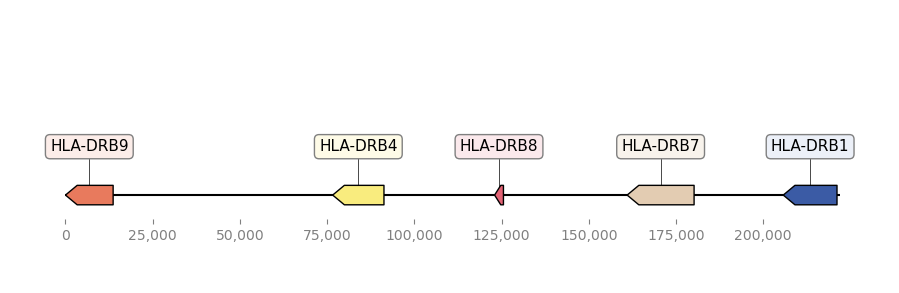

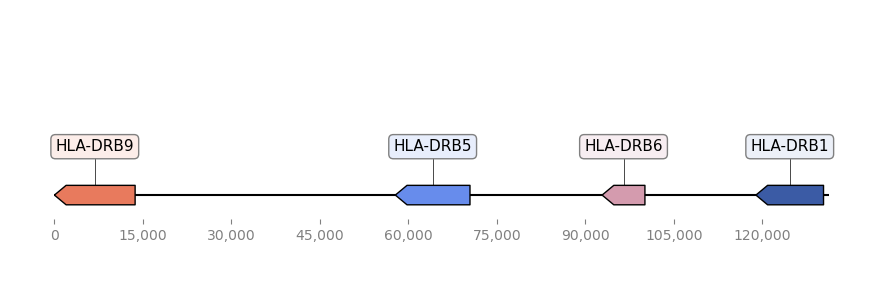

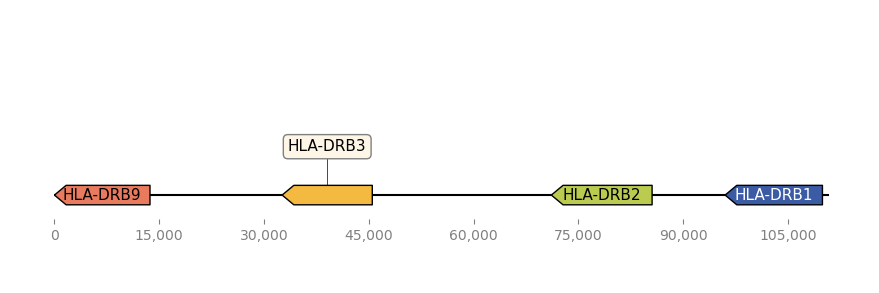

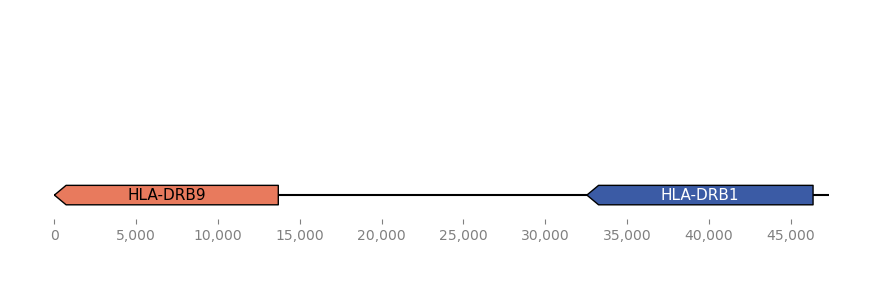

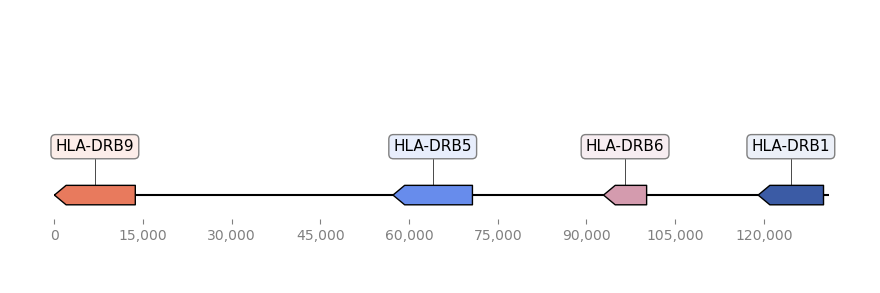

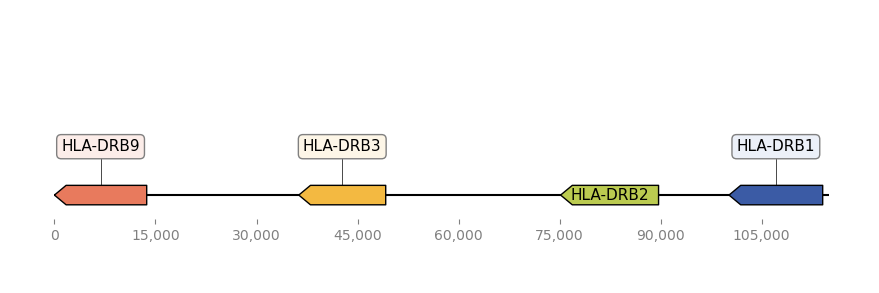

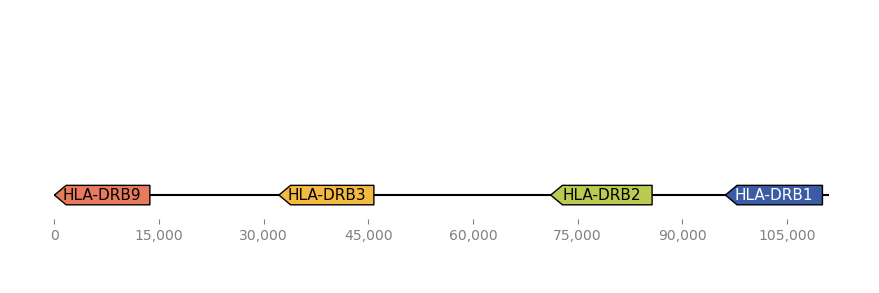

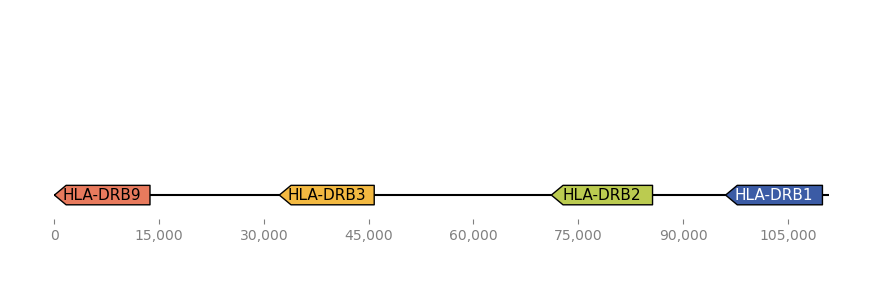

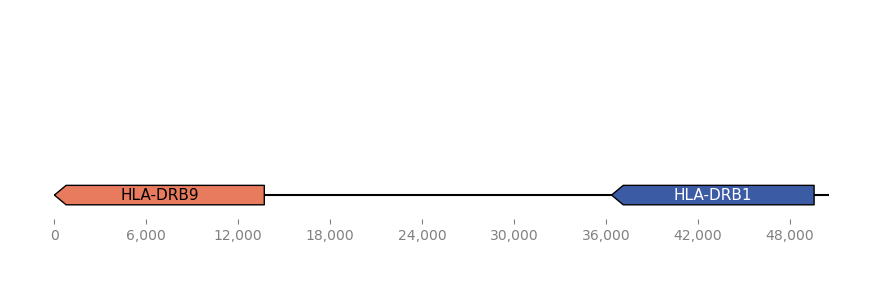

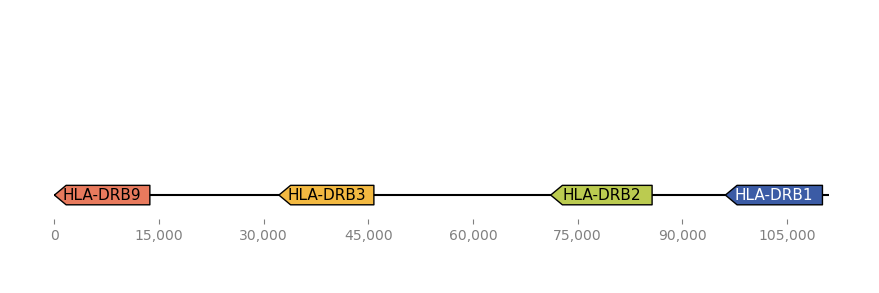

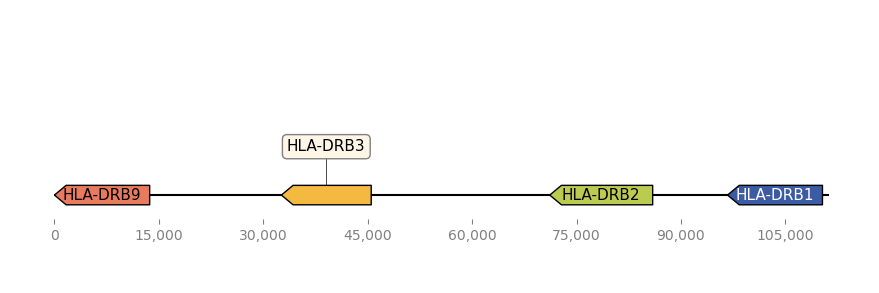

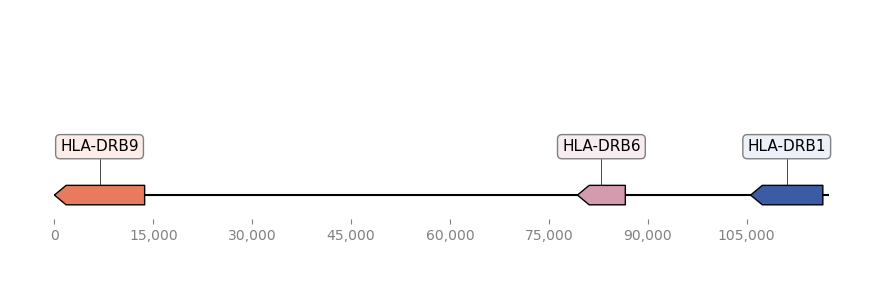

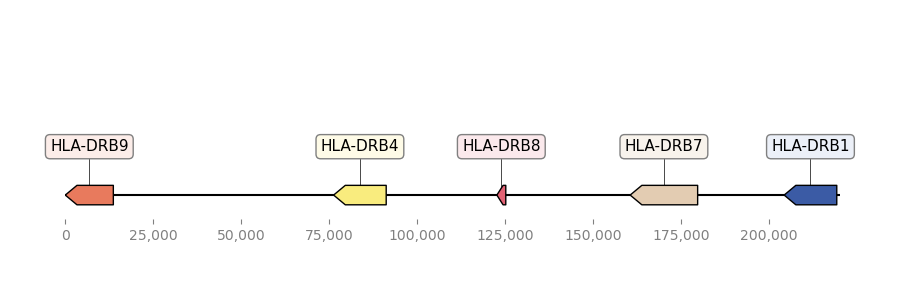

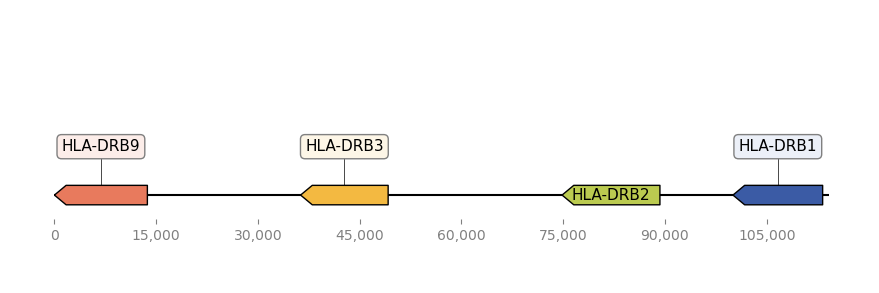

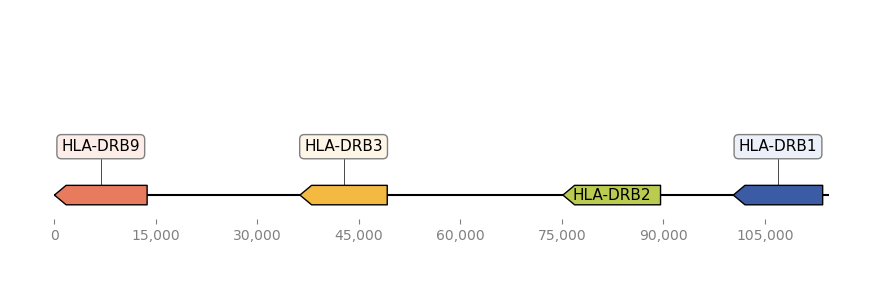

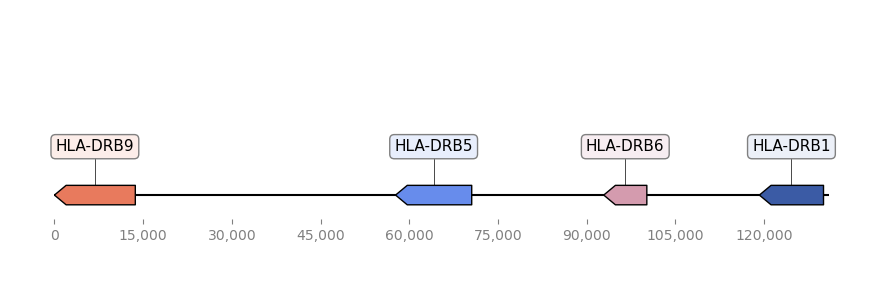

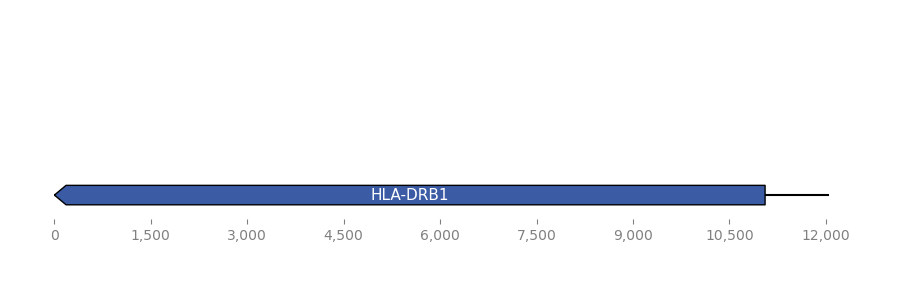

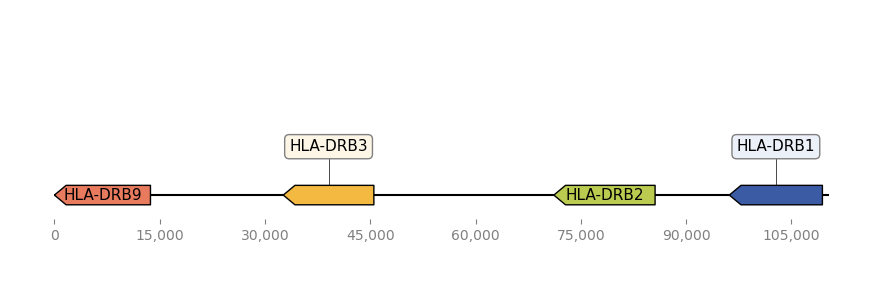

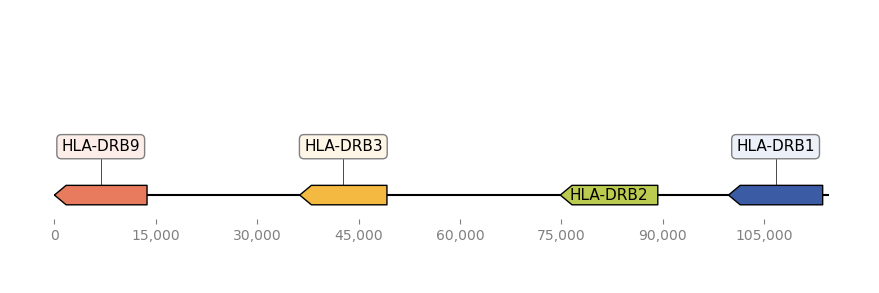

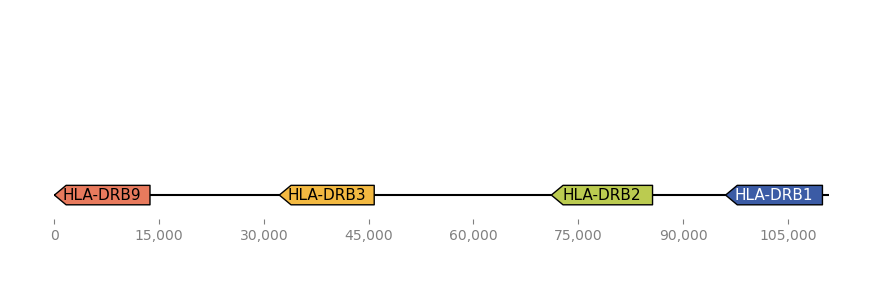

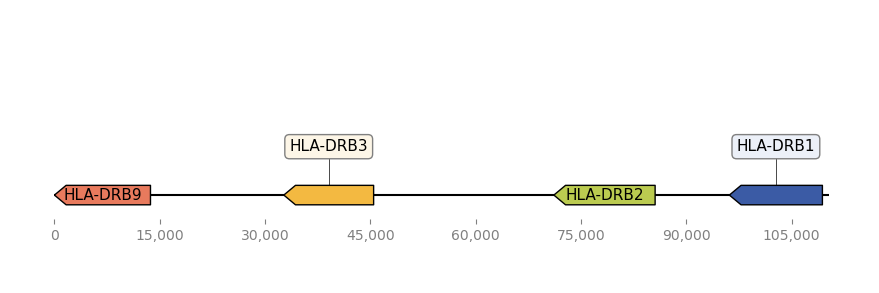

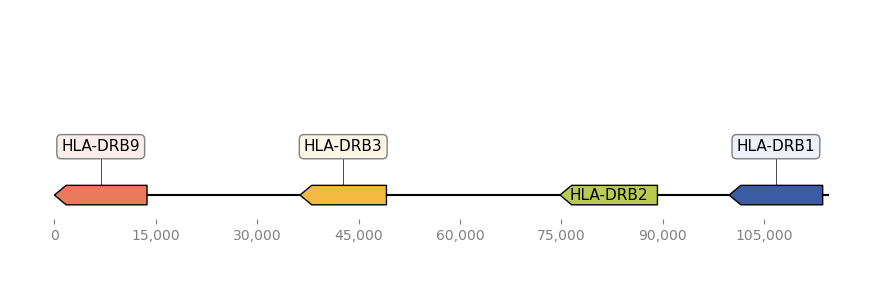

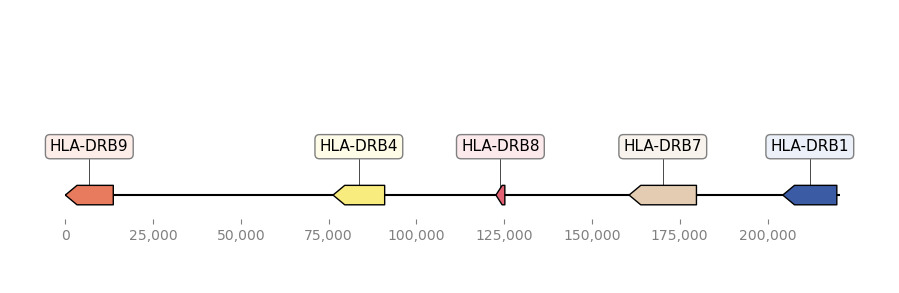

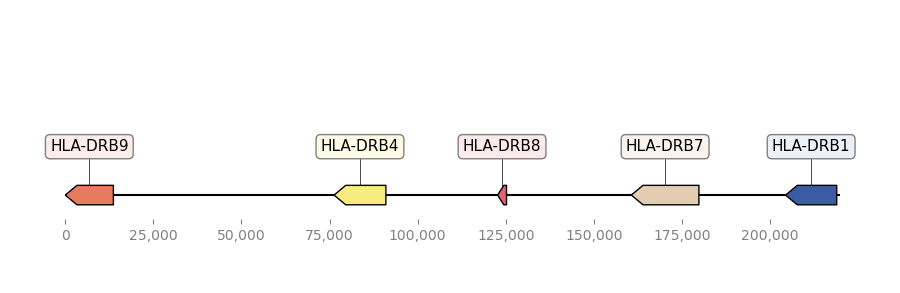

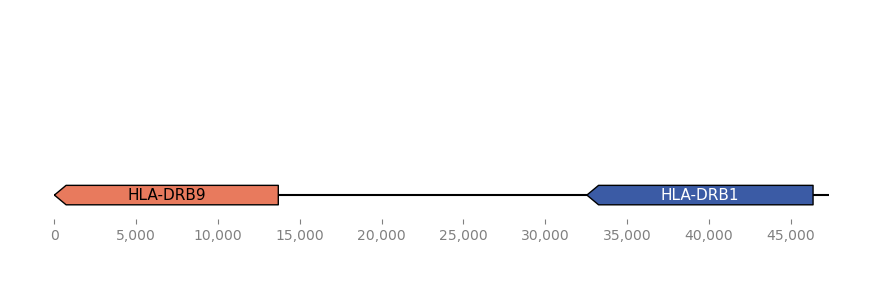

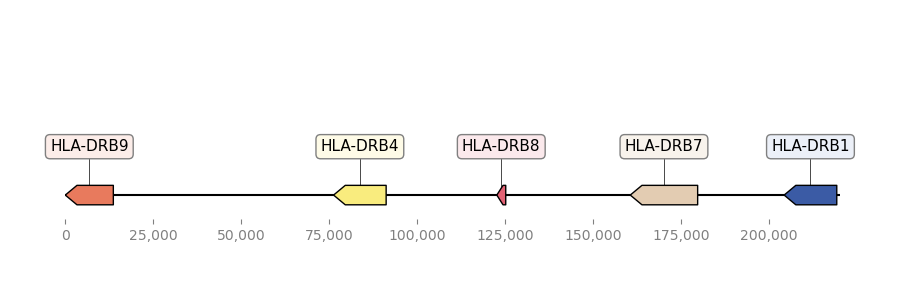

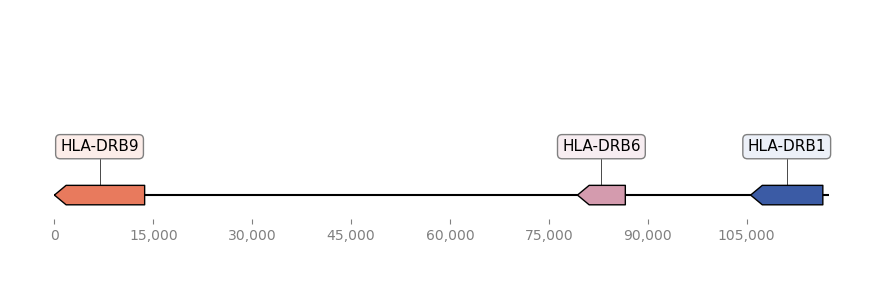

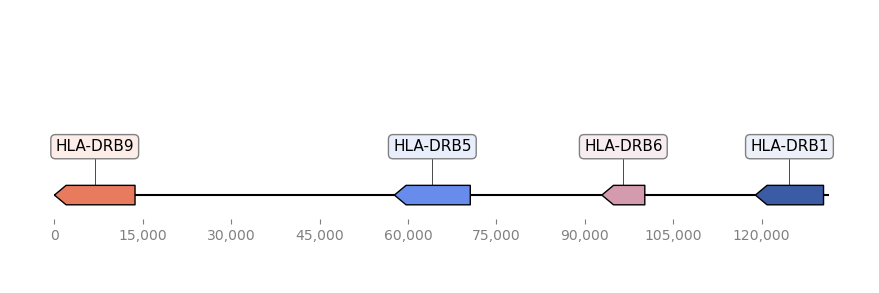

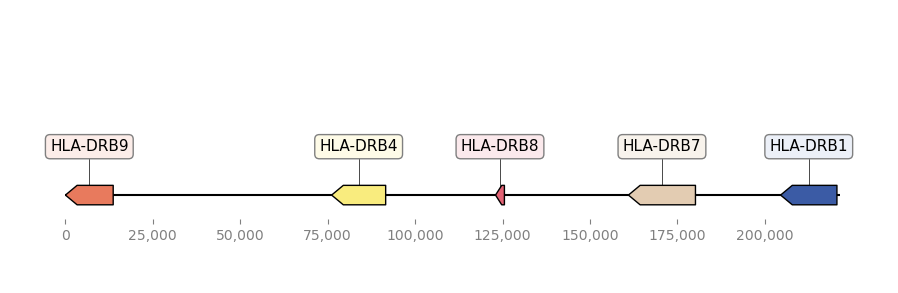

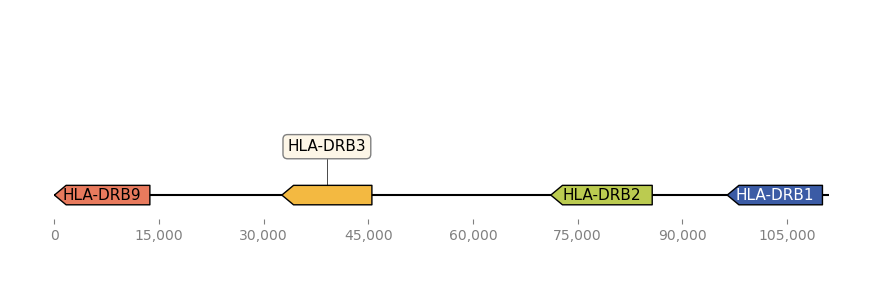

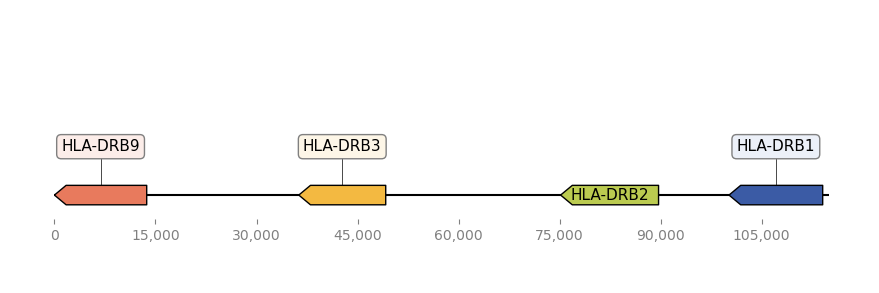

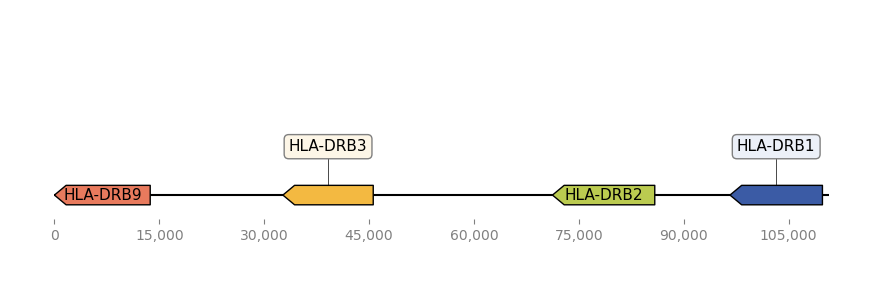

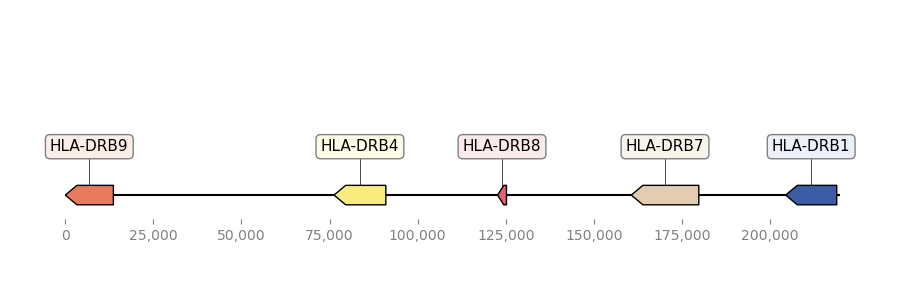

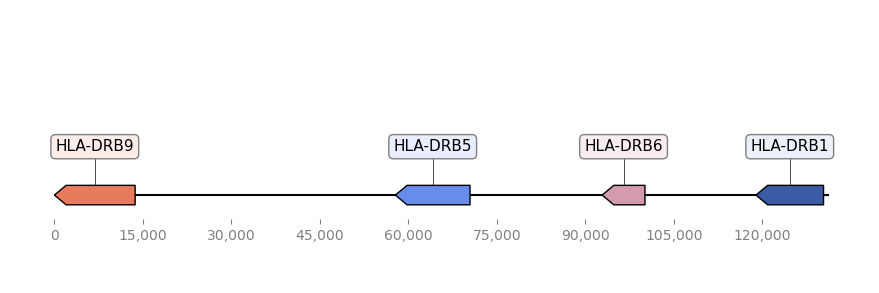

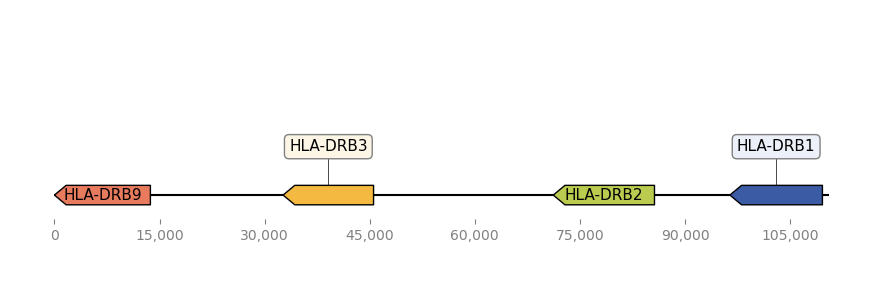

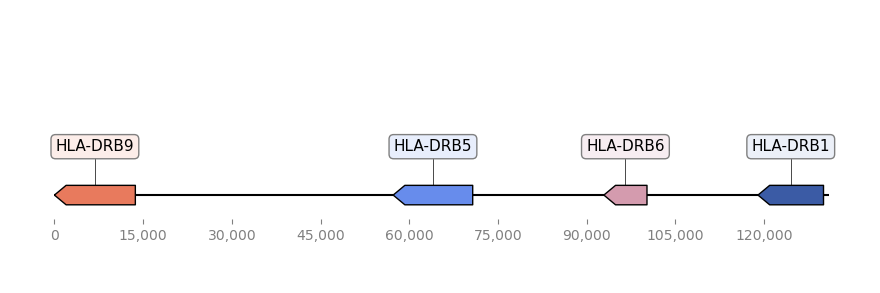

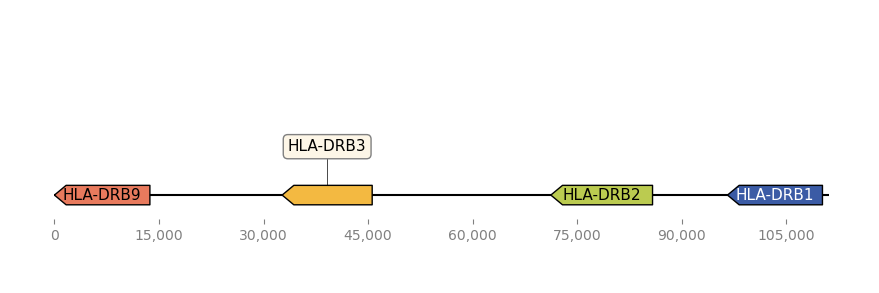

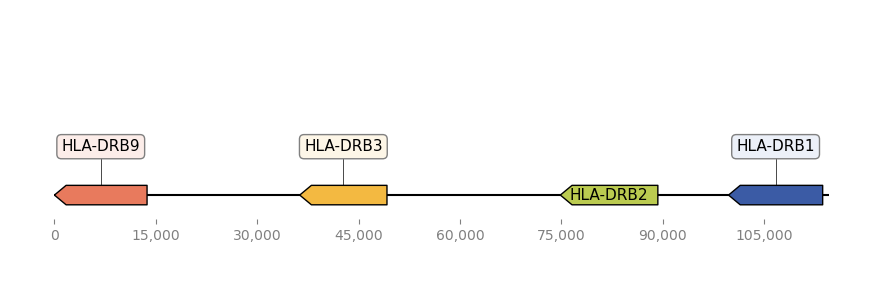

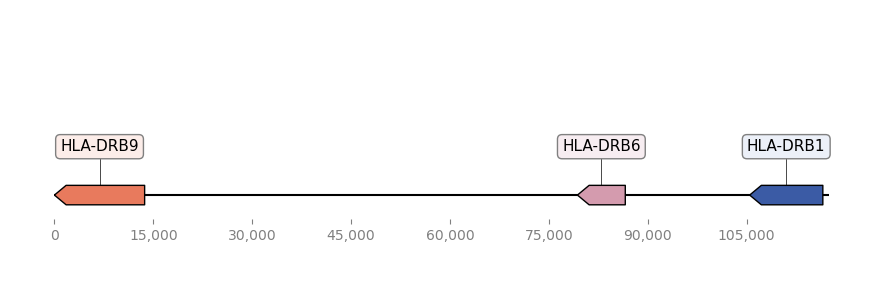

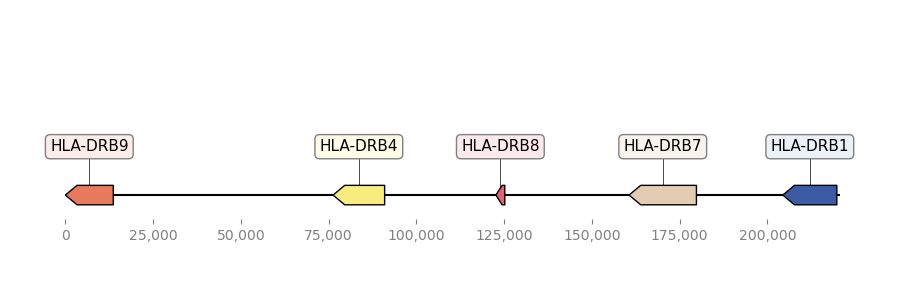

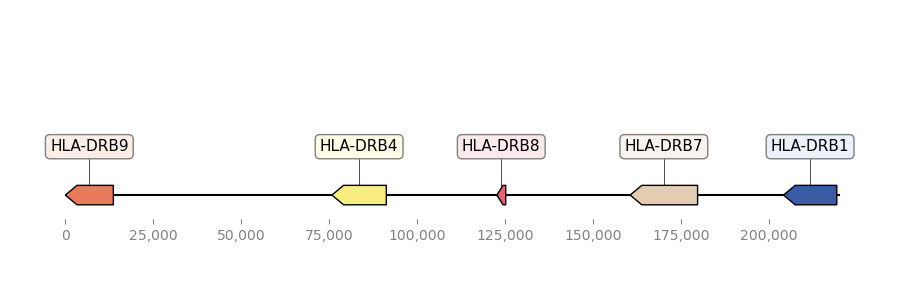

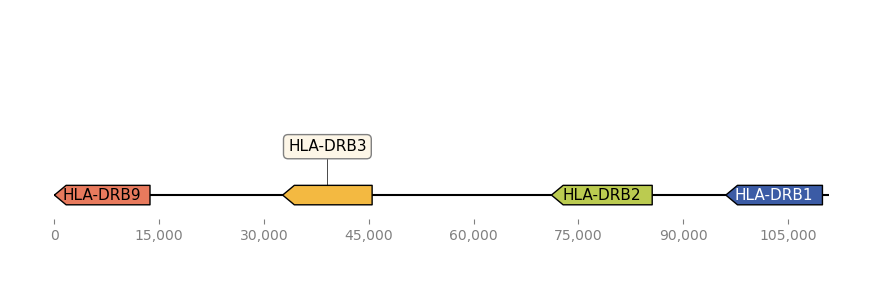

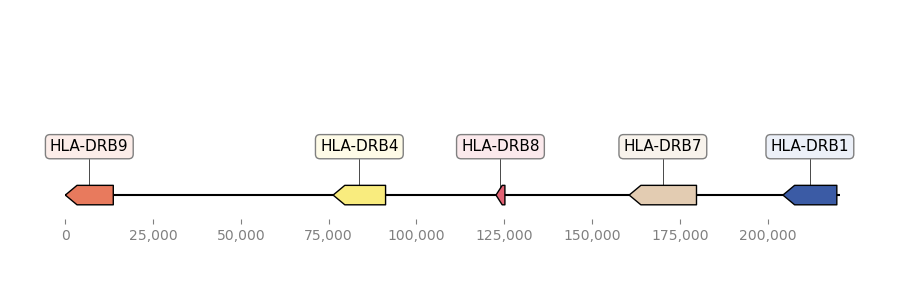

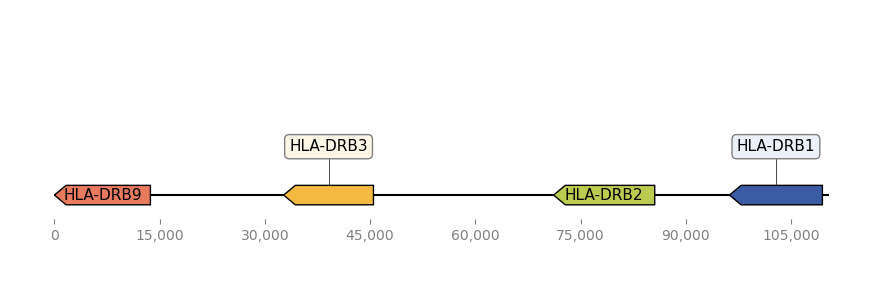

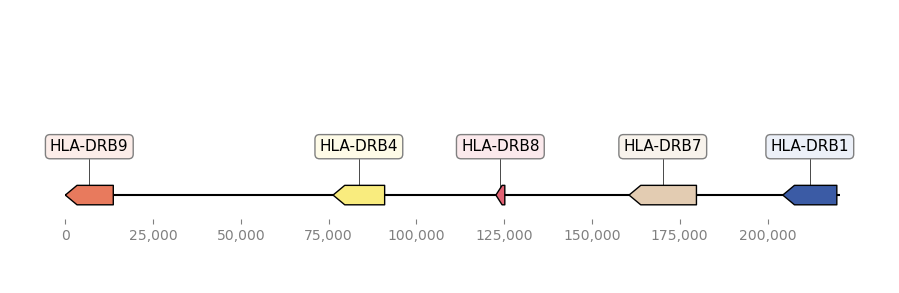

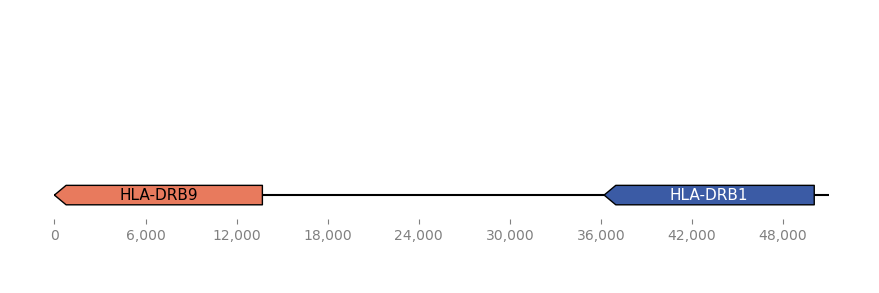

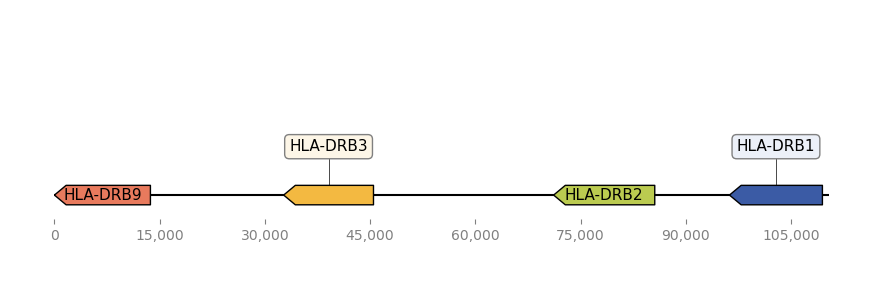

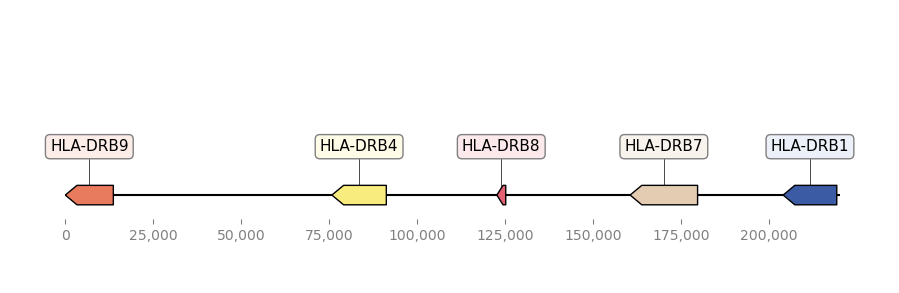

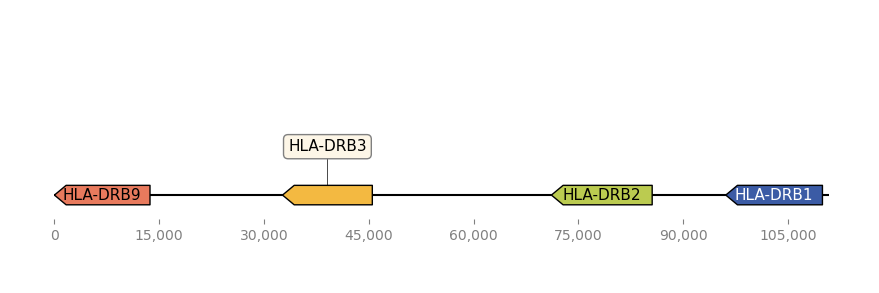

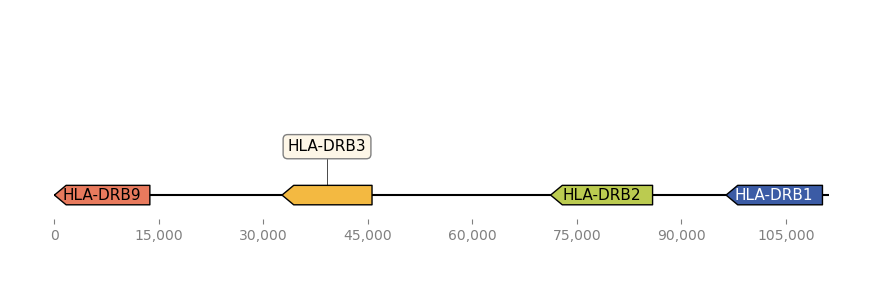

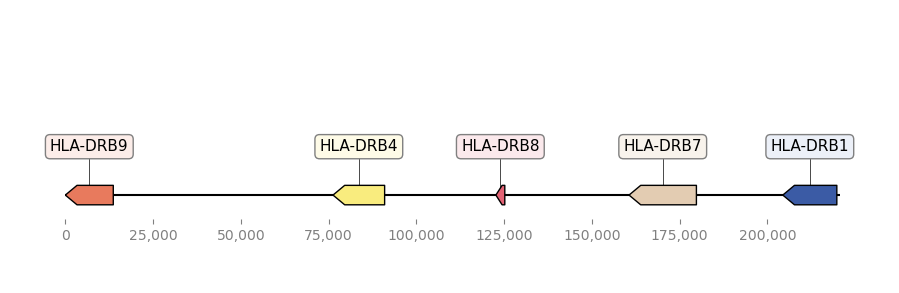

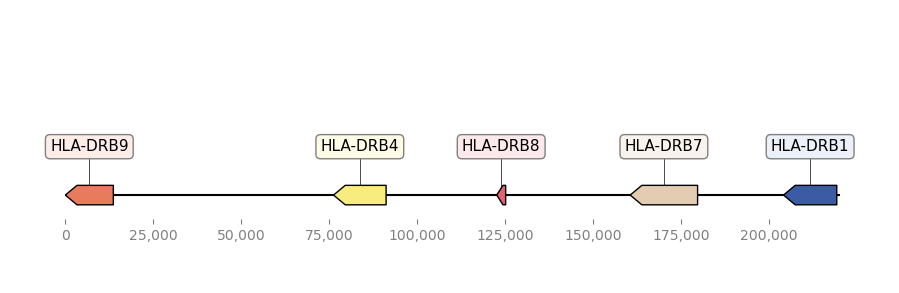

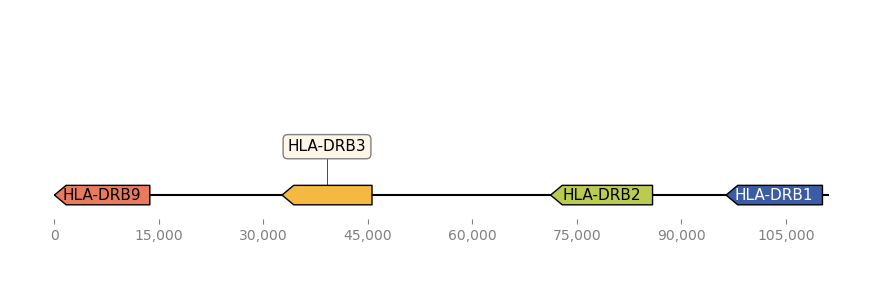

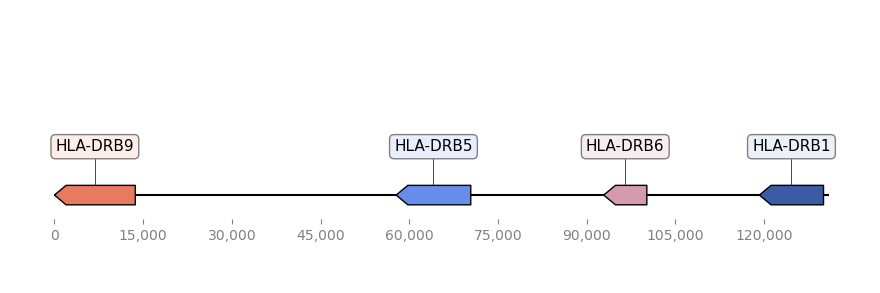

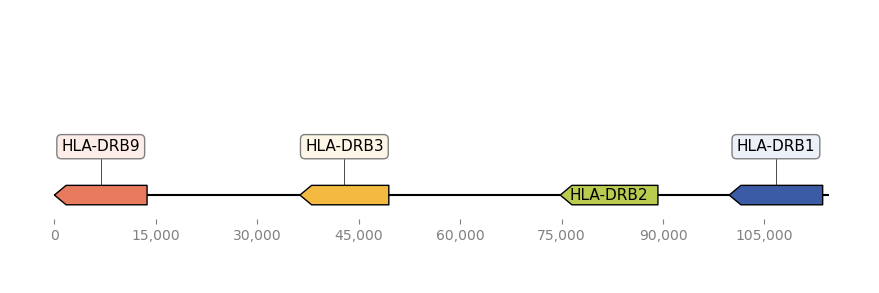

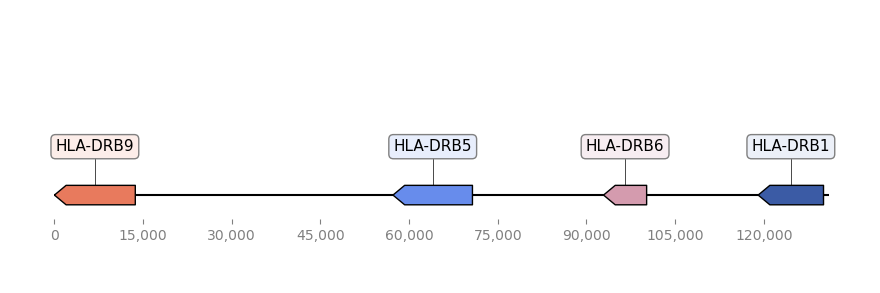

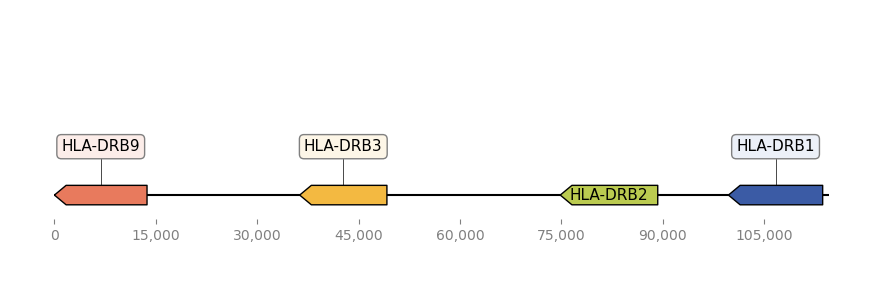

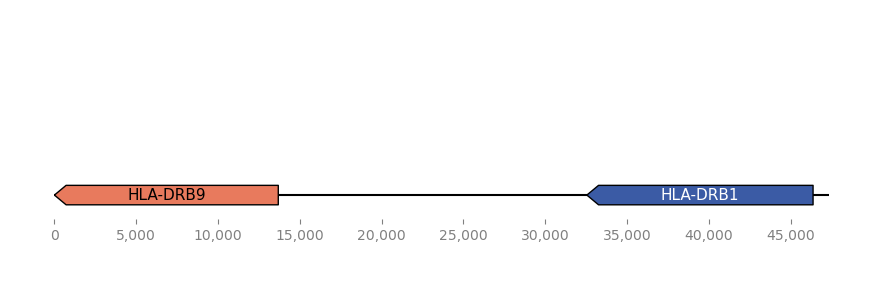

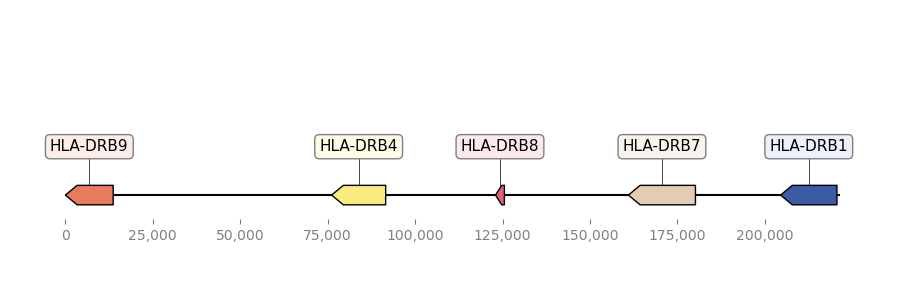

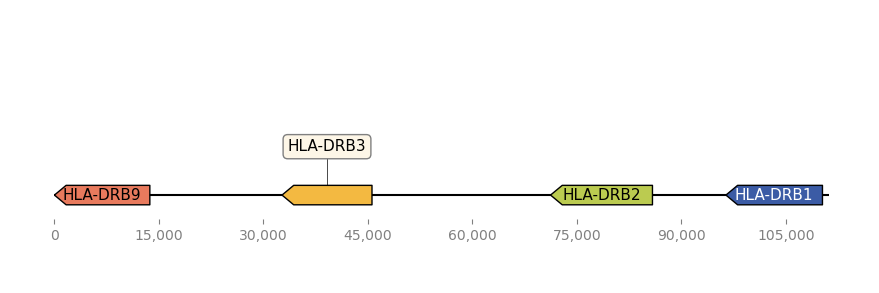

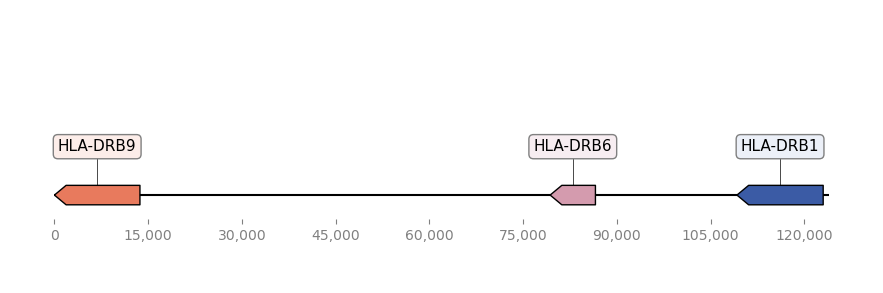

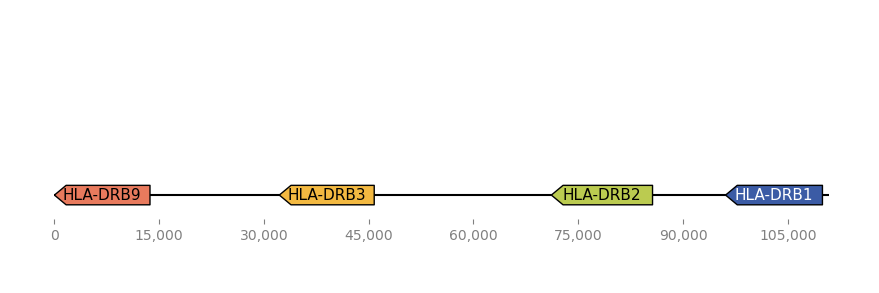

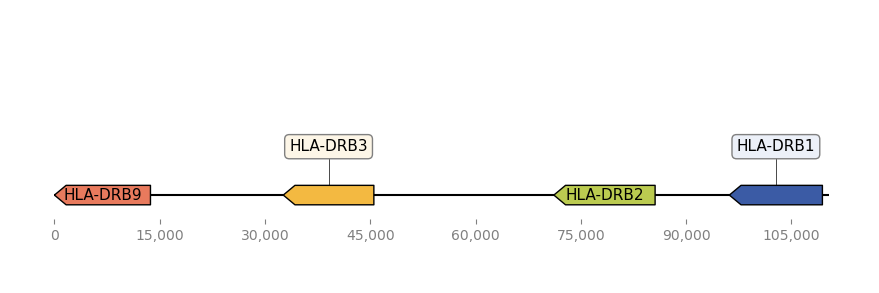

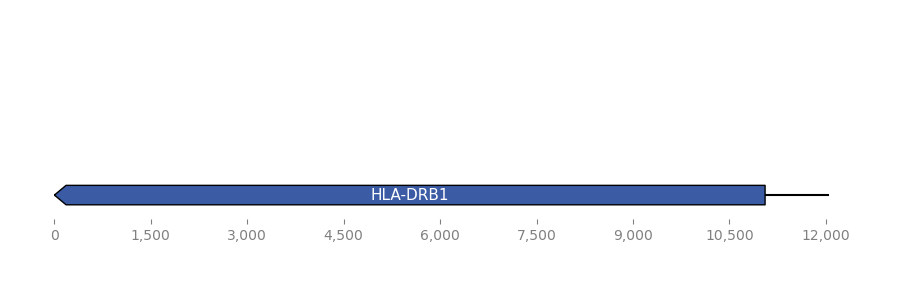

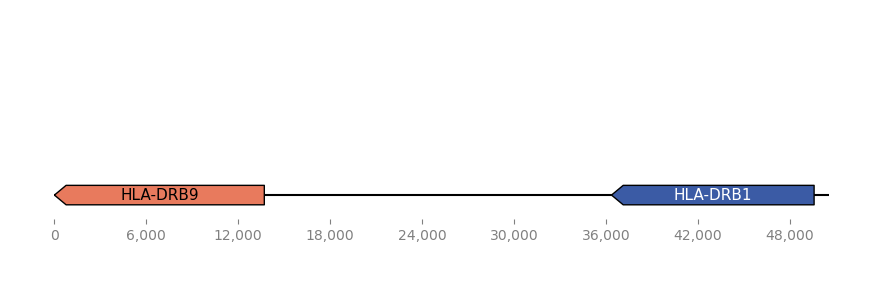

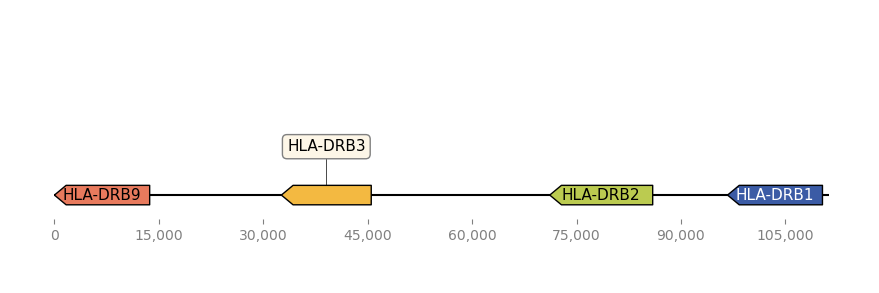

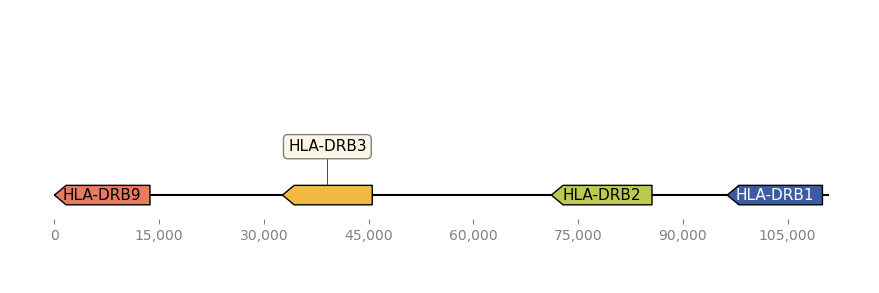

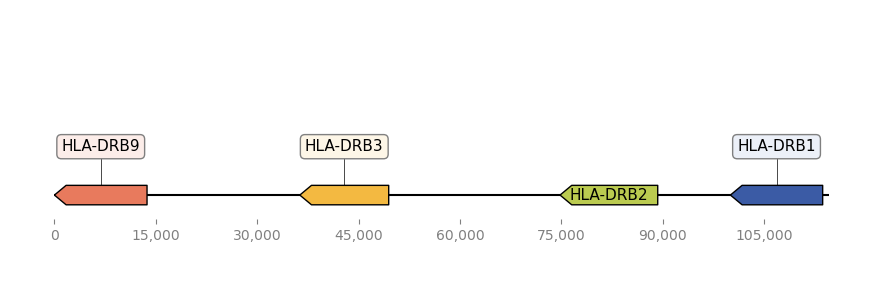

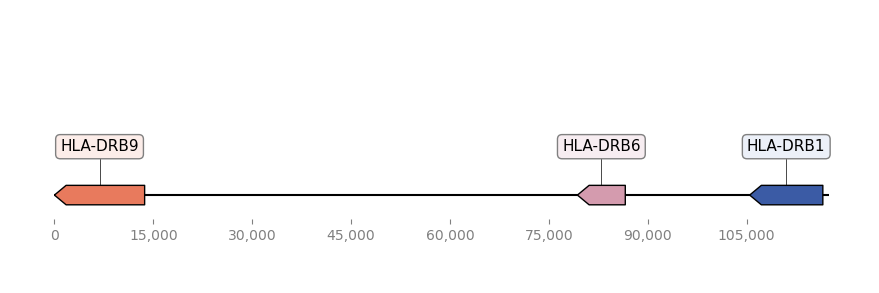

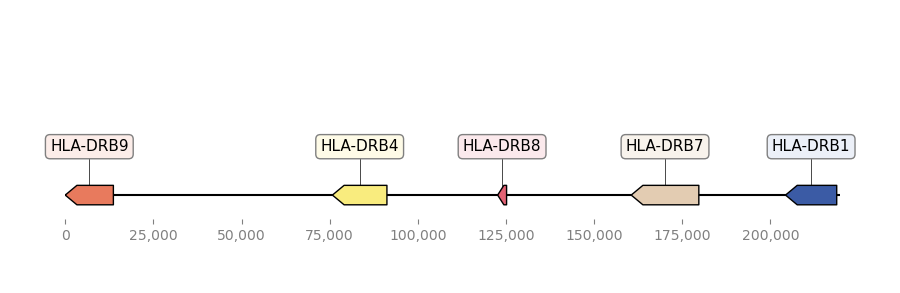

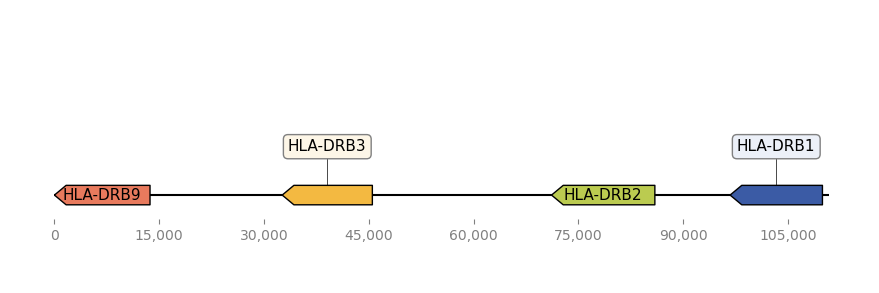

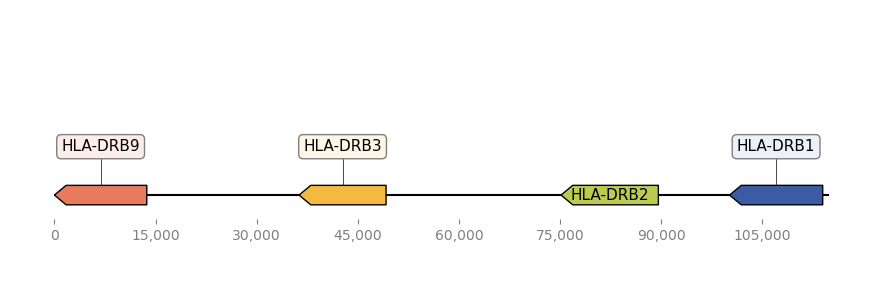

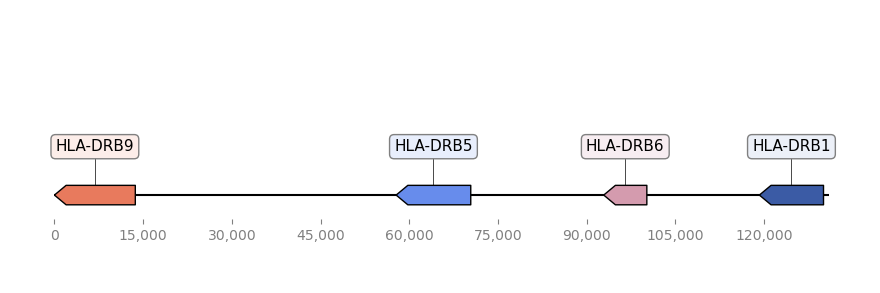

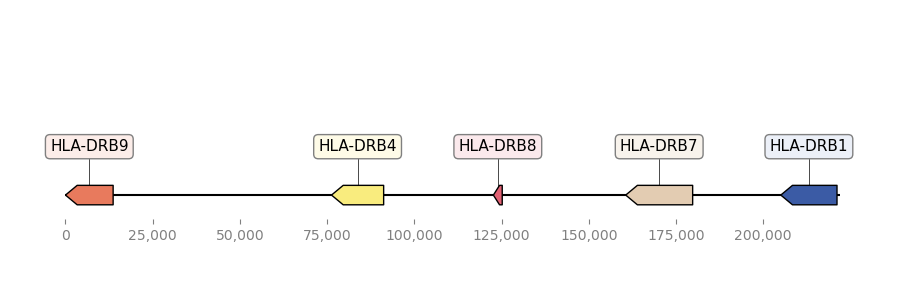

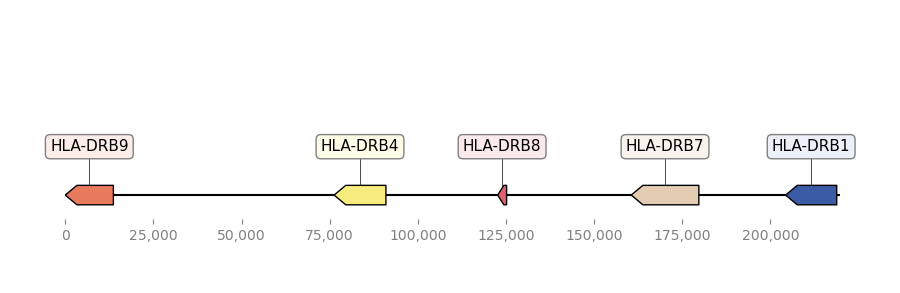

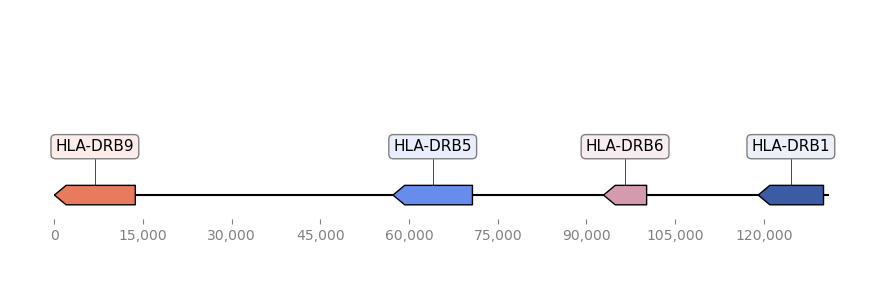

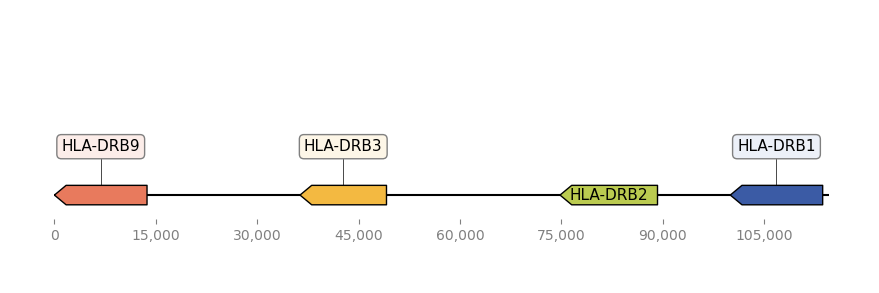

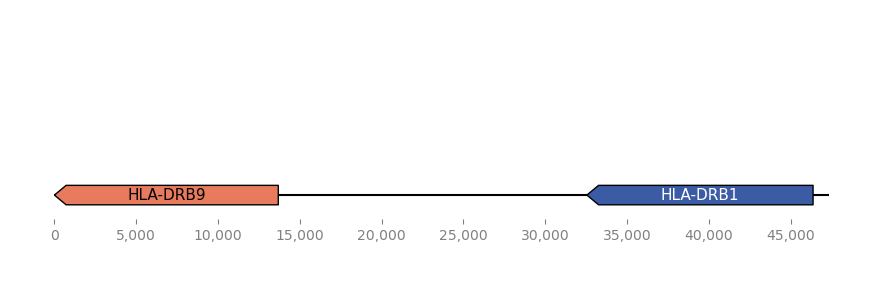

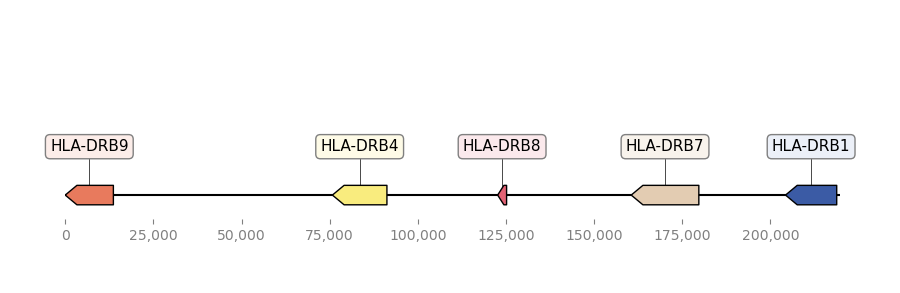

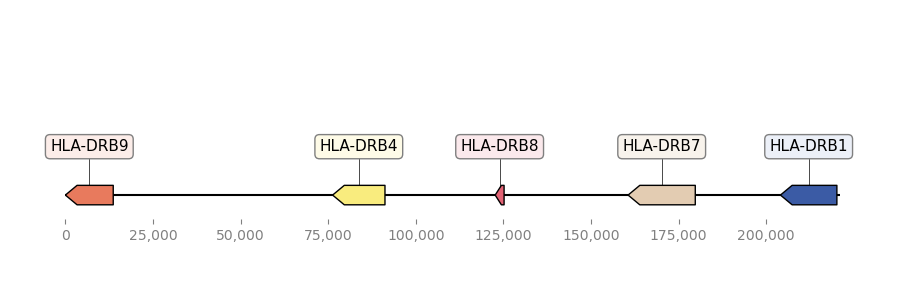

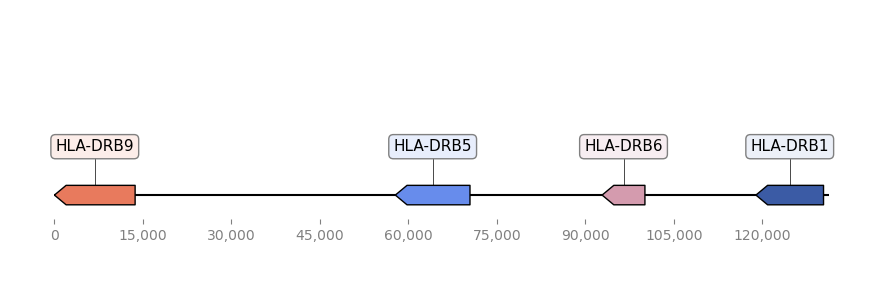

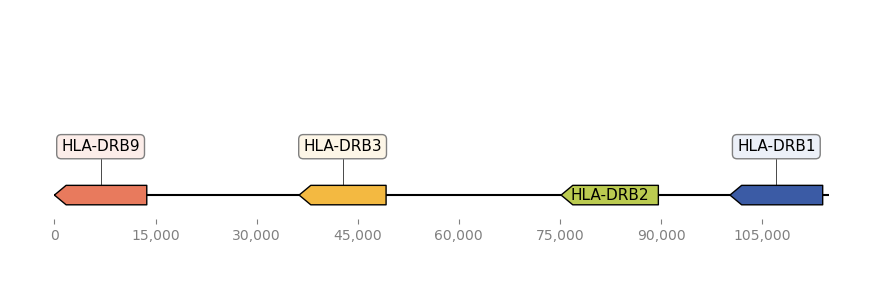

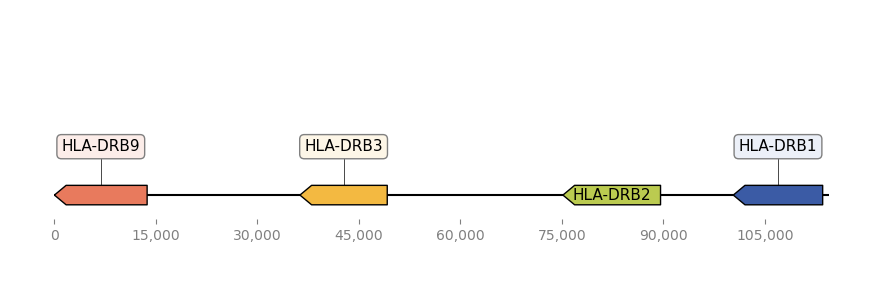

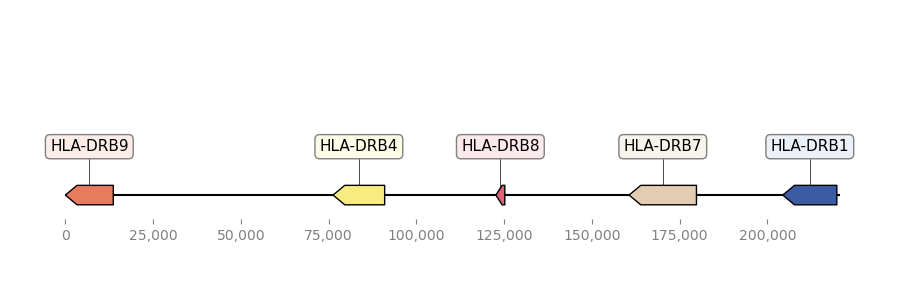

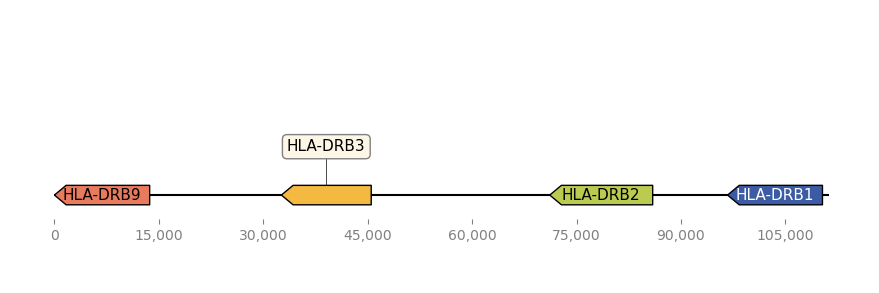

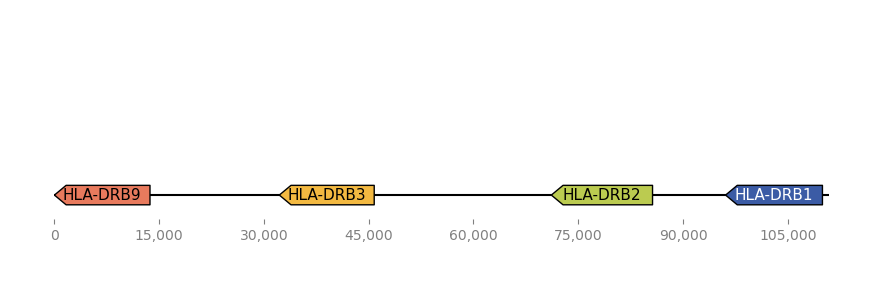

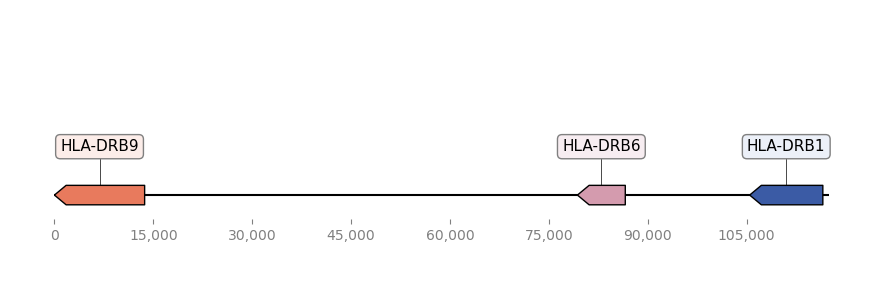

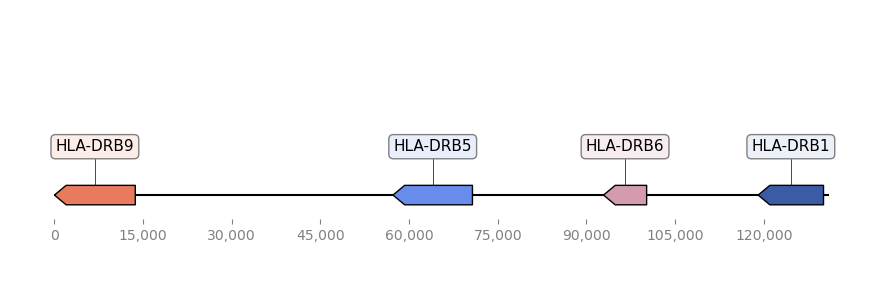

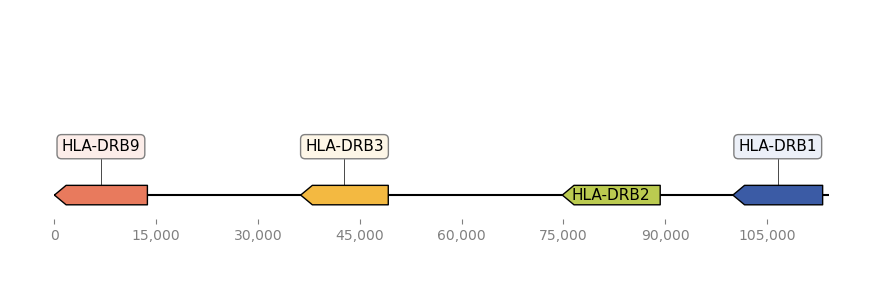

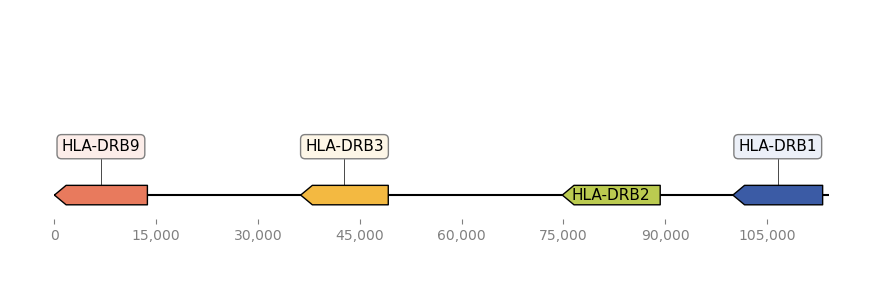

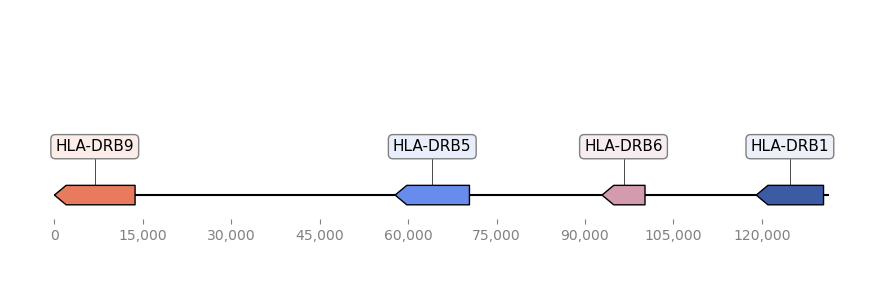

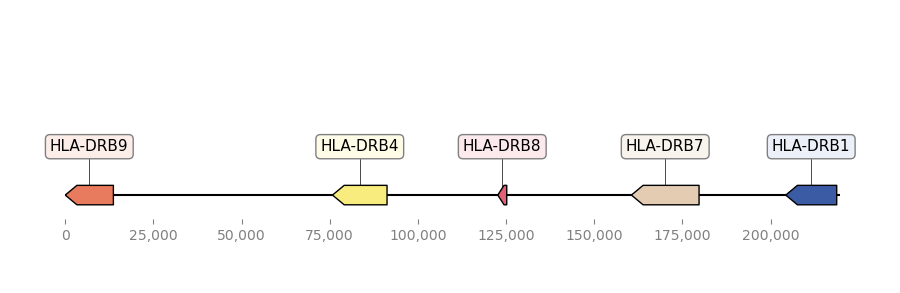

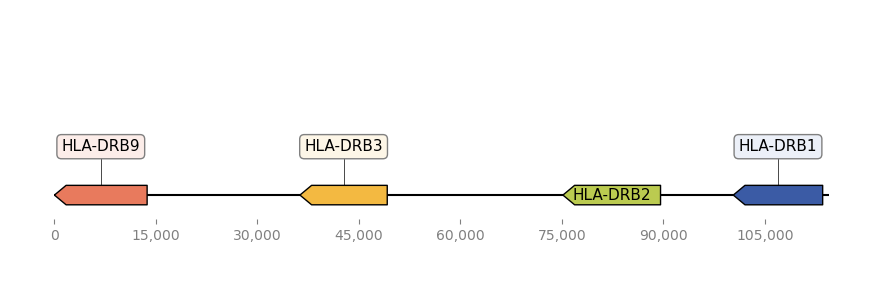

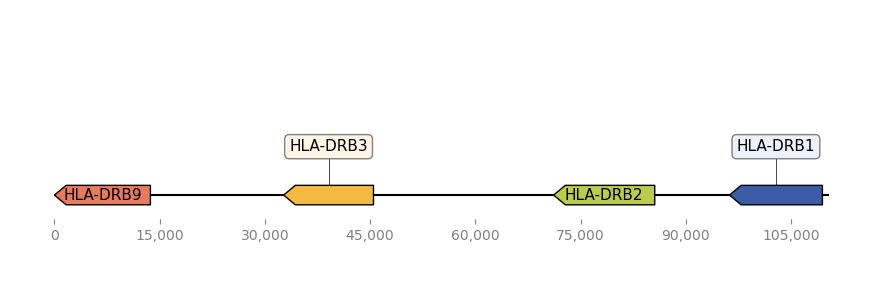

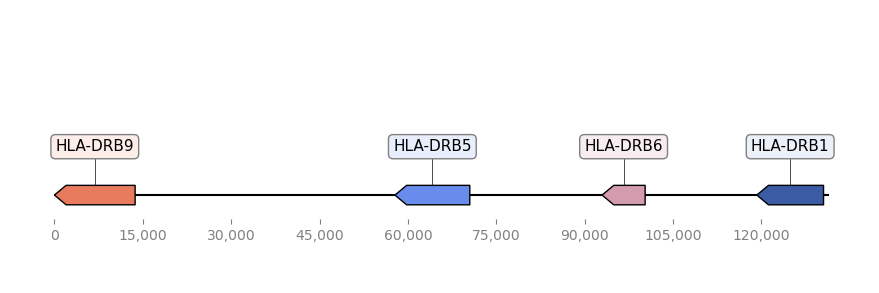

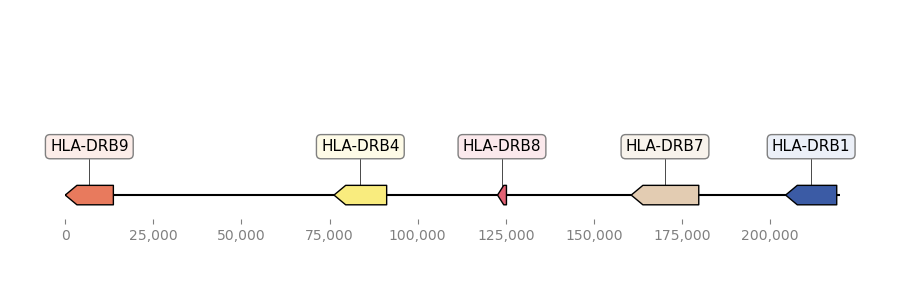

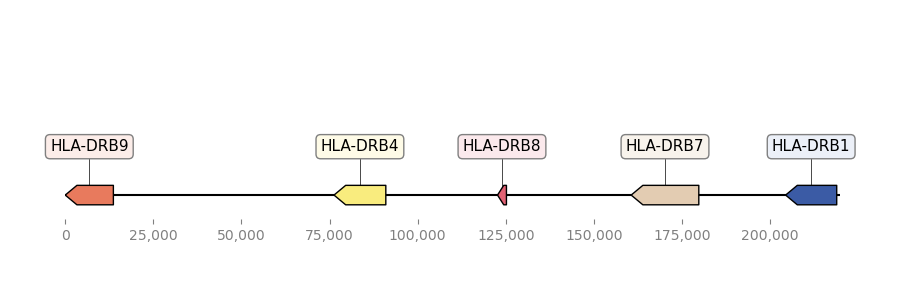

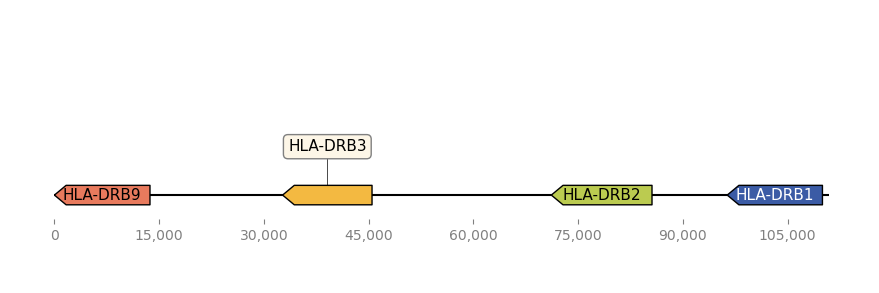

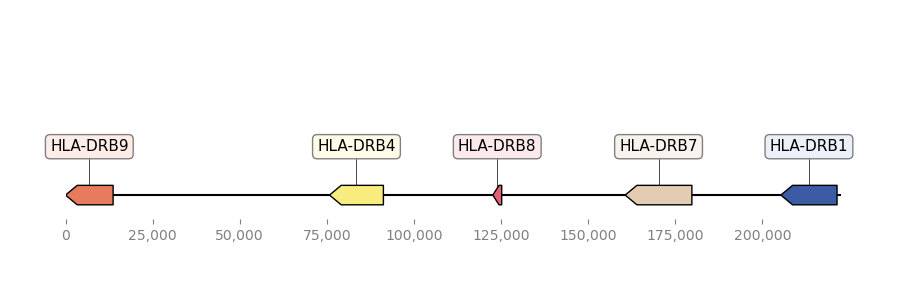

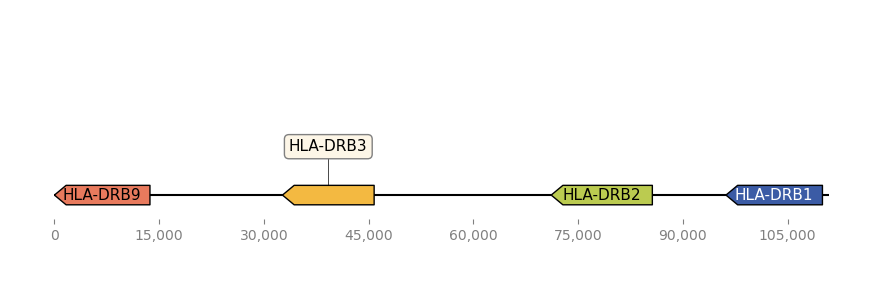

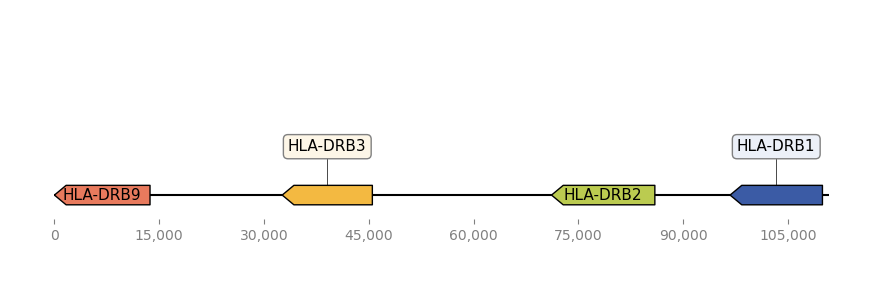

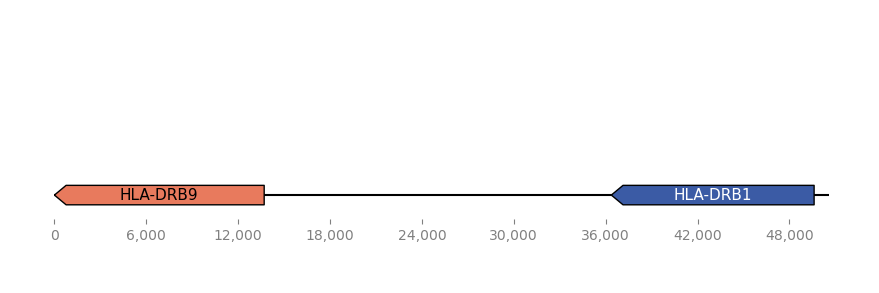

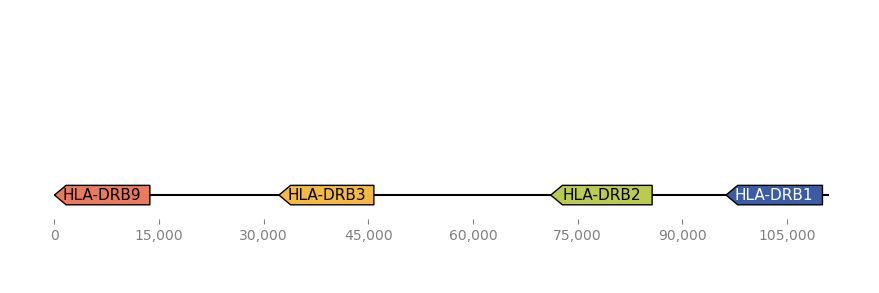

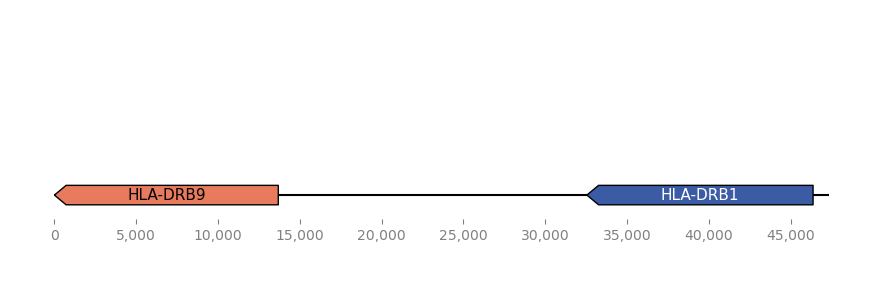

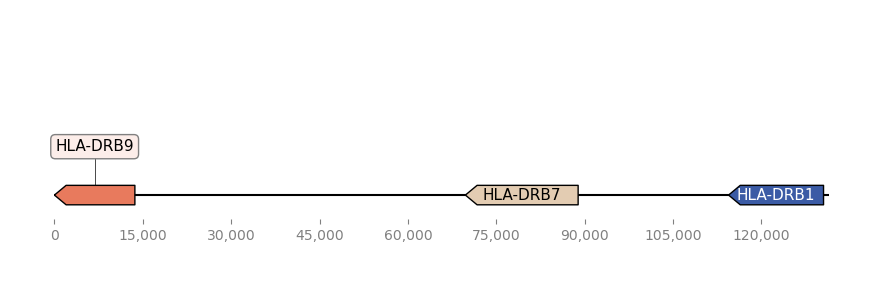

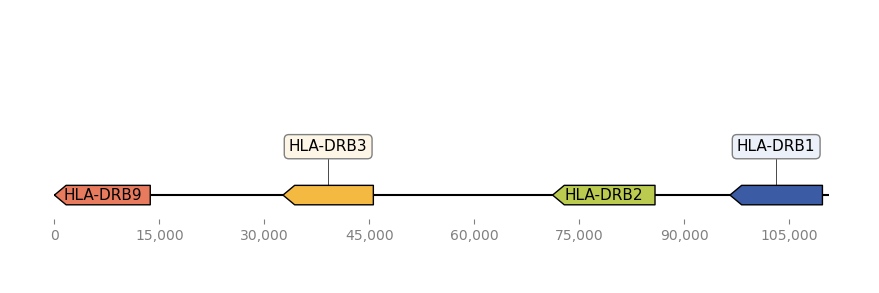

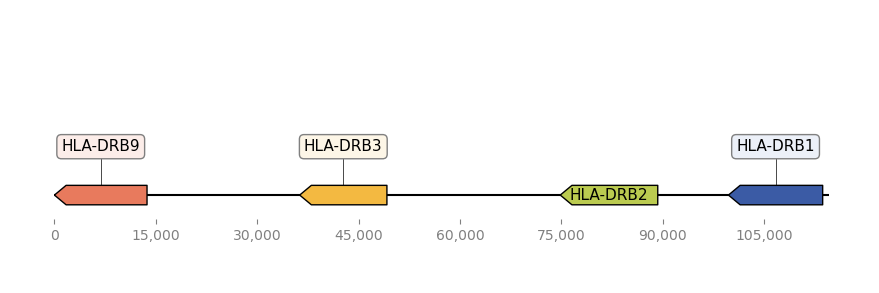

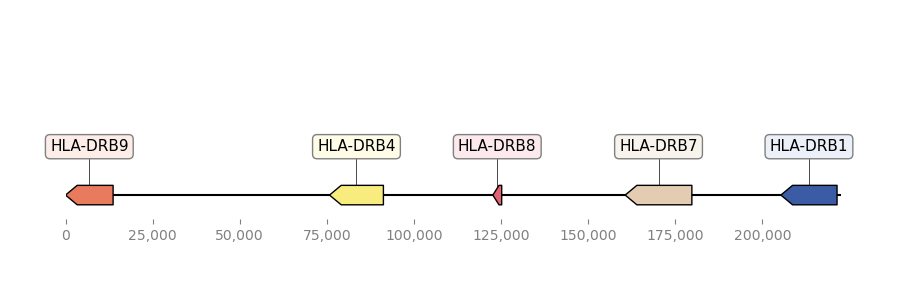

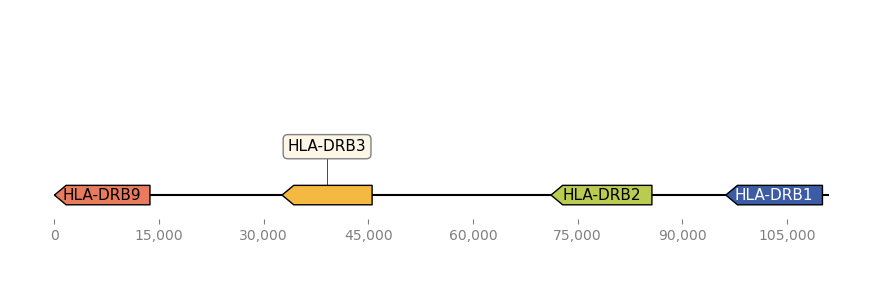

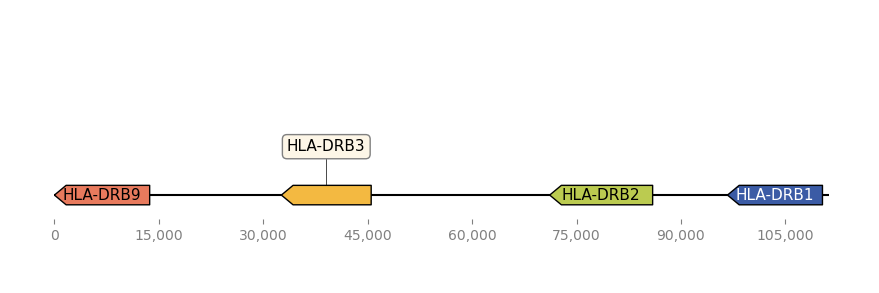

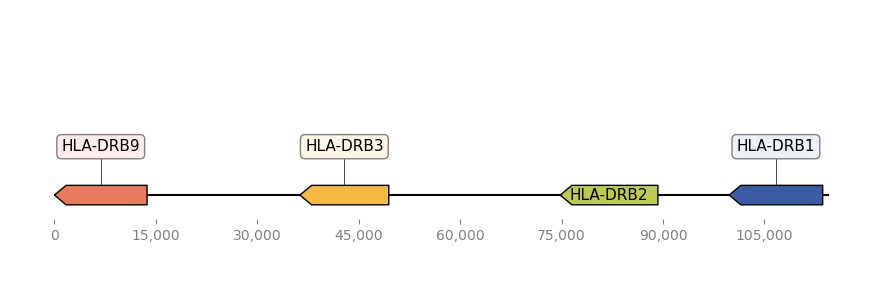

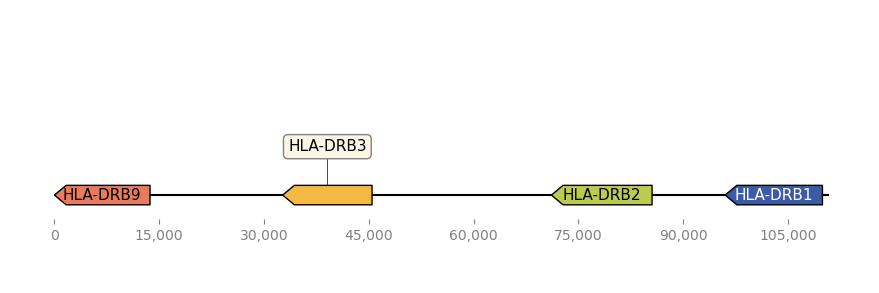

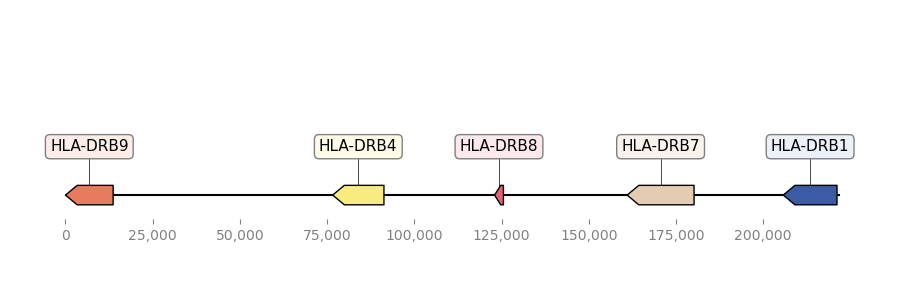

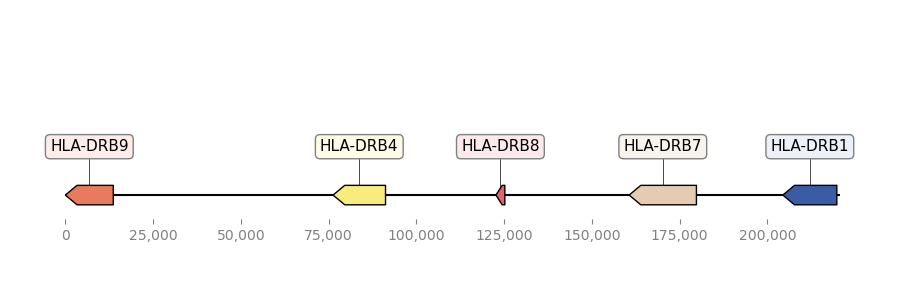

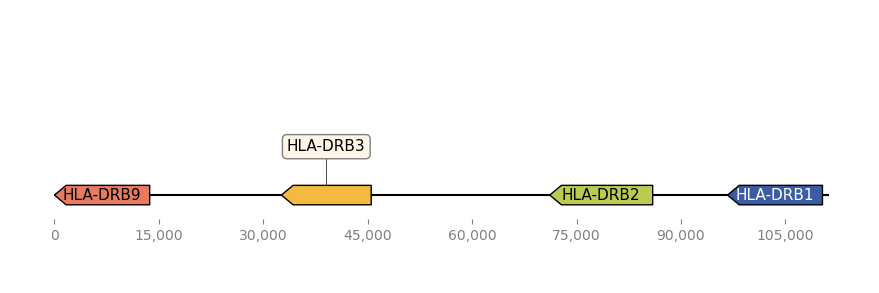

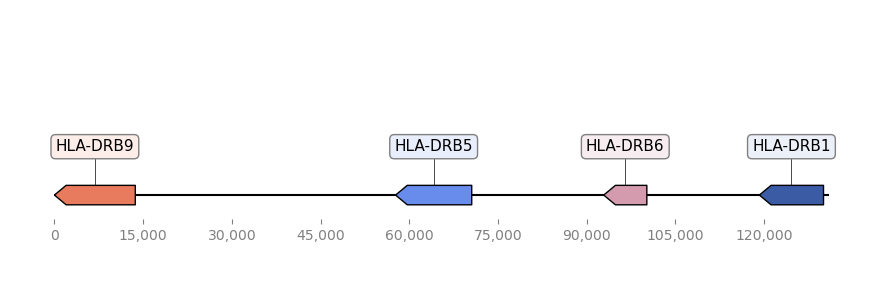

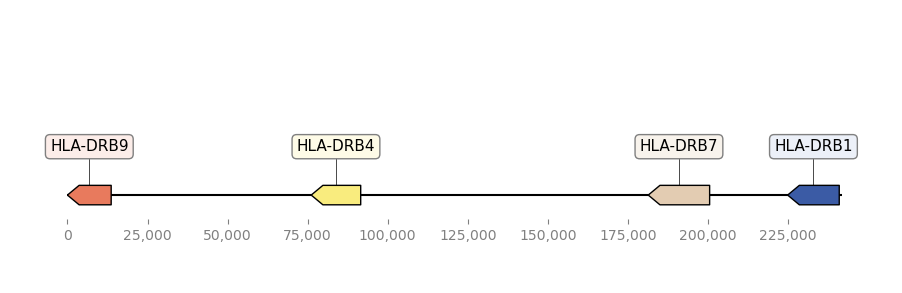

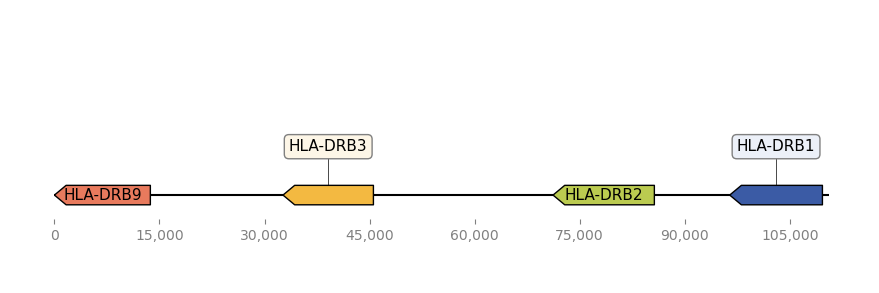

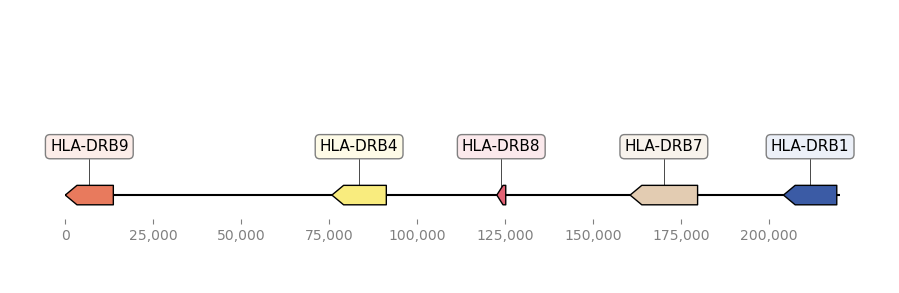

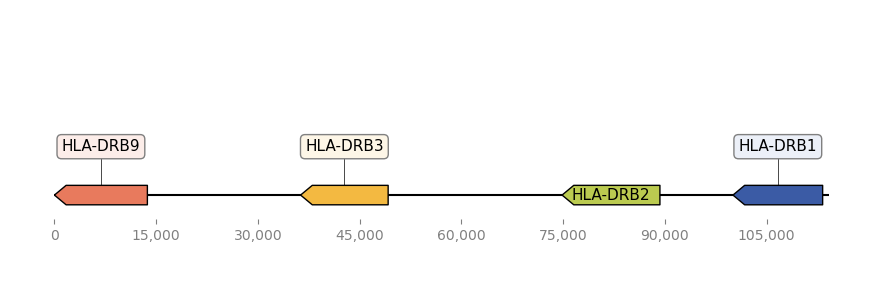

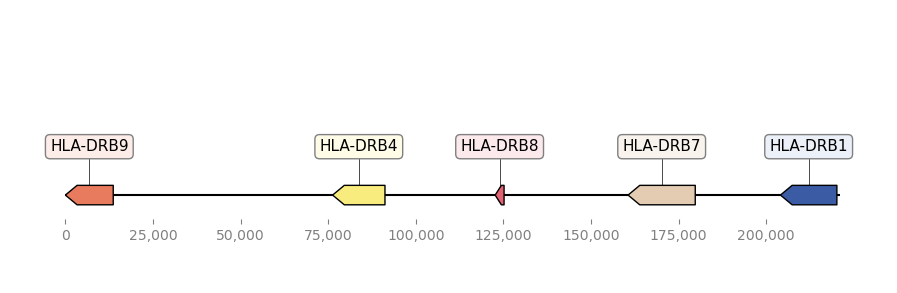

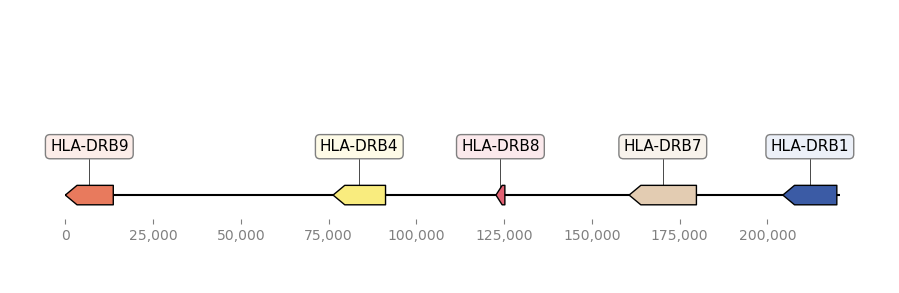

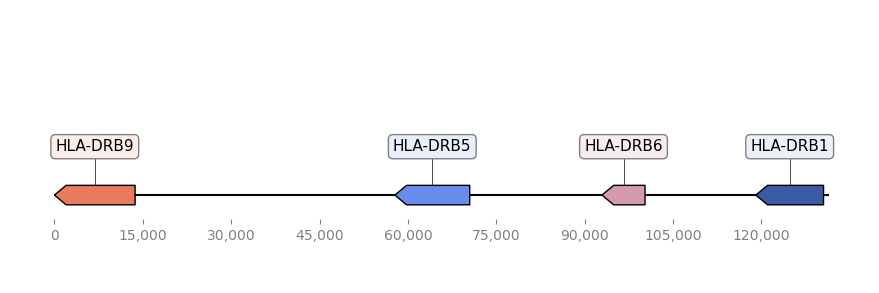

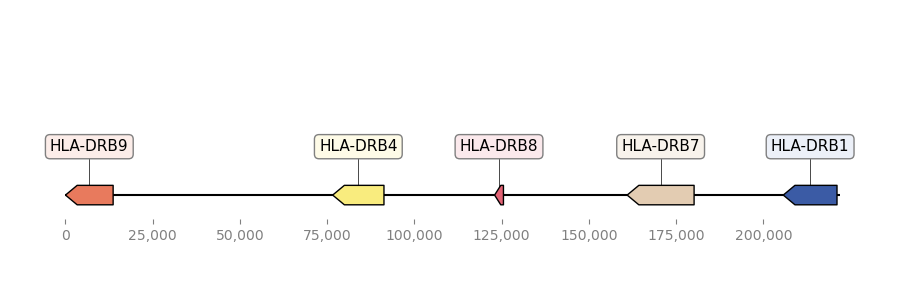

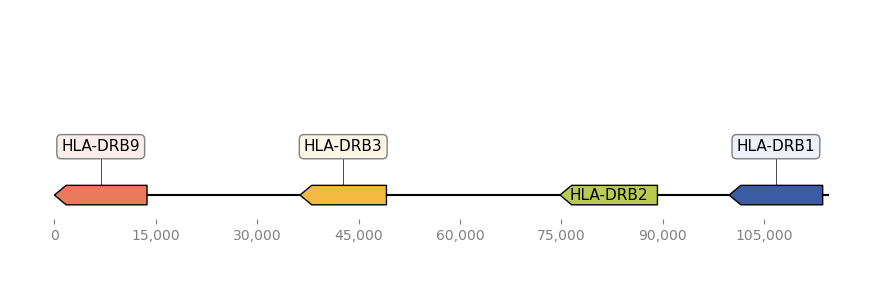

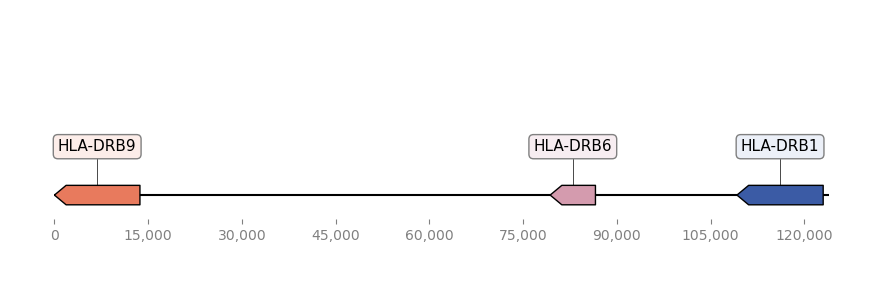

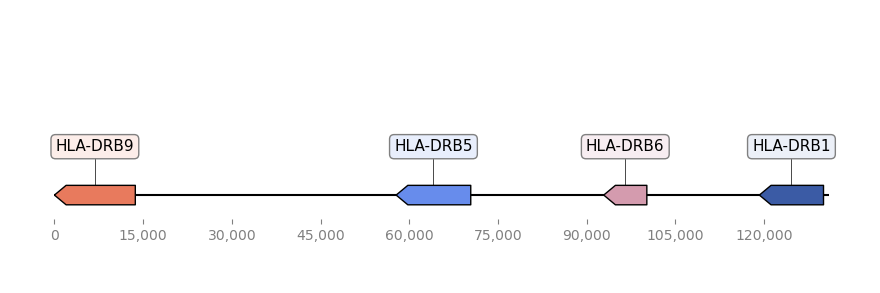

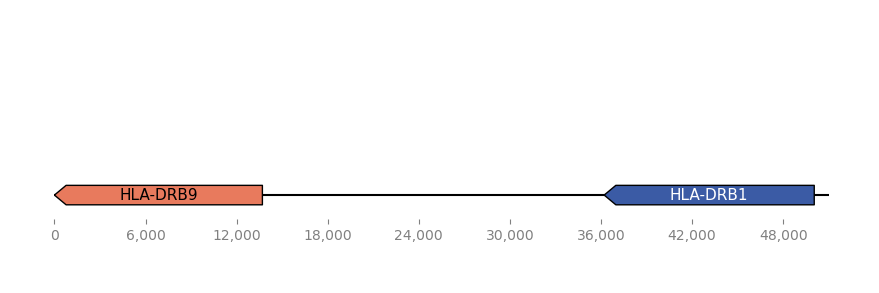

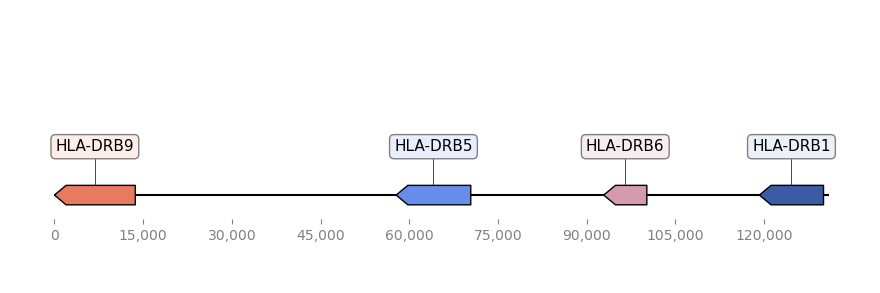

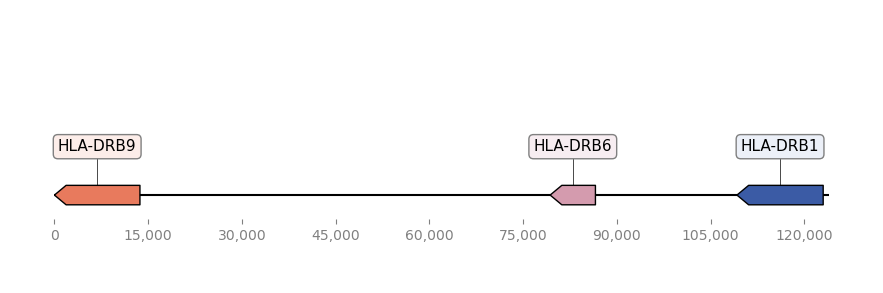

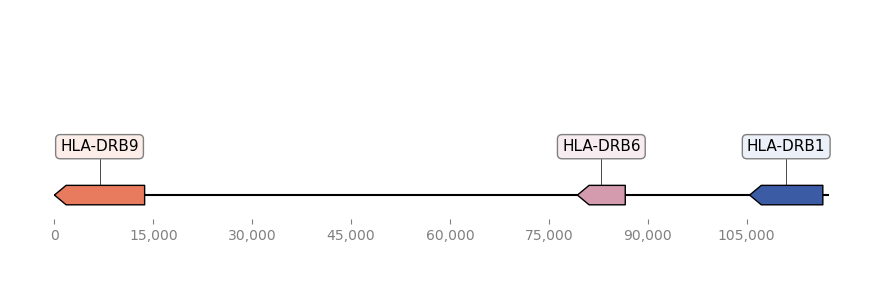

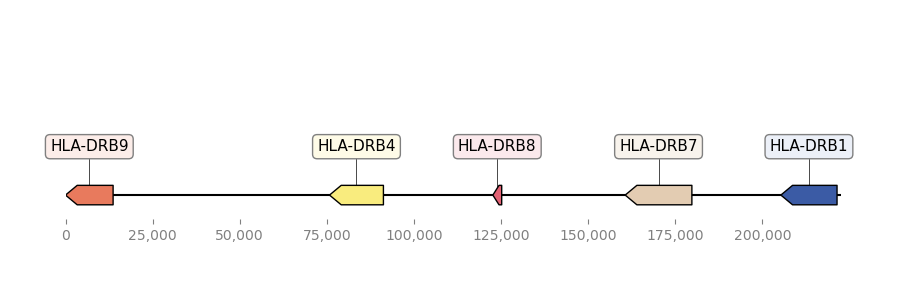

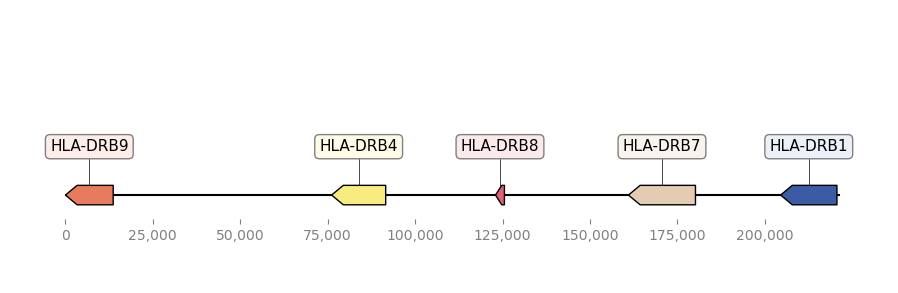

In [110]:
sampleDictHap = []
for sample in set(DRB_DF[5]):
    #print(sample)
    tempDF = DRB_DF[(DRB_DF[5]==sample) & (DRB_DF[11].str.contains("HLA-DRB", regex=True))].copy()
    startCoordinate = min(tempDF[6])
    segmentLength = max(tempDF[7])-startCoordinate
    
    tempList=[]
    for gene in set(tempDF[11]):
        tempDF2 = tempDF[tempDF[11]==gene].copy()
        tempDF2.sort_values(by=[6], inplace=True)

    
        if gene == 'HLA-DRB9':
            if len(tempDF2)>2:
                tempDF2 = tempDF2.head(2)
                tempList.append([gene, min(tempDF2[6])-startCoordinate, max(tempDF2[7])-startCoordinate, -1, colorDict[gene]])

            else:
                tempList.append([gene, min(tempDF2[6])-startCoordinate, max(tempDF2[7])-startCoordinate, -1, colorDict[gene]])

        else:
            tempList.append([gene, min(tempDF2[6])-startCoordinate, max(tempDF2[7])-startCoordinate, -1, colorDict[gene]])
        
    tempDF3 = pd.DataFrame(data=tempList, columns=['Gene', 'Start', 'End', 'Orientation', 'Color'])
    #print(collections.Counter(tempDF3['Gene']))
    sampleDictHap.append([sample,'_'.join(sorted([x for x in tempDF3['Gene']]))])
    tempDF3.drop_duplicates(subset=['Gene'], inplace=True)
    tempDF3.sort_values(by=['Start'], inplace=True)
      
    features=[]     
    for row in tempDF3.index:
        features.append(GraphicFeature(start=int(tempDF3.at[row,'Start']), end=int(tempDF3.at[row,'End']), strand=int(tempDF3.at[row,'Orientation']), color=str(tempDF3.at[row,'Color']), label=str(tempDF3.at[row,'Gene'])))
    record = GraphicRecord(sequence_length=segmentLength+1000, features=features)
    ax, _ = record.plot(figure_width=10)
    #ax.figure.savefig('/home/mark/Desktop/HLA/DRB/Figures/Sample_Haplotypes/'+str(sample)+"_DRBHap.svg", bbox_inches='tight')

In [111]:
sampleDictHap

[['NA19036.hap2', 'HLA-DRB1_HLA-DRB2_HLA-DRB3_HLA-DRB9'],
 ['HG02769.hap2', 'HLA-DRB1_HLA-DRB2_HLA-DRB3_HLA-DRB9'],
 ['HG02059.hap2', 'HLA-DRB1_HLA-DRB5_HLA-DRB6_HLA-DRB9'],
 ['HG02282.hap2', 'HLA-DRB1_HLA-DRB2_HLA-DRB3_HLA-DRB9'],
 ['HG03248.hap2', 'HLA-DRB1_HLA-DRB4_HLA-DRB7_HLA-DRB8_HLA-DRB9'],
 ['NA19240.hap2', 'HLA-DRB1_HLA-DRB5_HLA-DRB6_HLA-DRB9'],
 ['HG01114.hap2', 'HLA-DRB1_HLA-DRB2_HLA-DRB3_HLA-DRB9'],
 ['HG00513.hap2', 'HLA-DRB1_HLA-DRB9'],
 ['HG01457.hap1', 'HLA-DRB1_HLA-DRB5_HLA-DRB6_HLA-DRB9'],
 ['hg38.hap2', 'HLA-DRB1_HLA-DRB2_HLA-DRB3_HLA-DRB9'],
 ['HG00731.hap1', 'HLA-DRB1_HLA-DRB2_HLA-DRB3_HLA-DRB9'],
 ['HG00732.hap1', 'HLA-DRB1_HLA-DRB2_HLA-DRB3_HLA-DRB9'],
 ['HG03452.hap1', 'HLA-DRB1_HLA-DRB9'],
 ['HG00733.hap2', 'HLA-DRB1_HLA-DRB2_HLA-DRB3_HLA-DRB9'],
 ['NA19238.hap2', 'HLA-DRB1_HLA-DRB2_HLA-DRB3_HLA-DRB9'],
 ['HG01505.hap2', 'HLA-DRB1_HLA-DRB6_HLA-DRB9'],
 ['NA12329.hap2', 'HLA-DRB1_HLA-DRB4_HLA-DRB7_HLA-DRB8_HLA-DRB9'],
 ['NA19036.hap1', 'HLA-DRB1_HLA-DRB2_HLA-DRB

In [34]:
ColorDict={'AFR':'#ffcd33', 'AFRAMR':'#ff9900', 'AMR':'#ff3c3c', 'EAS':'#acff33', 'EUR':'#63ebff', 'SAS':'#ff2fff'}

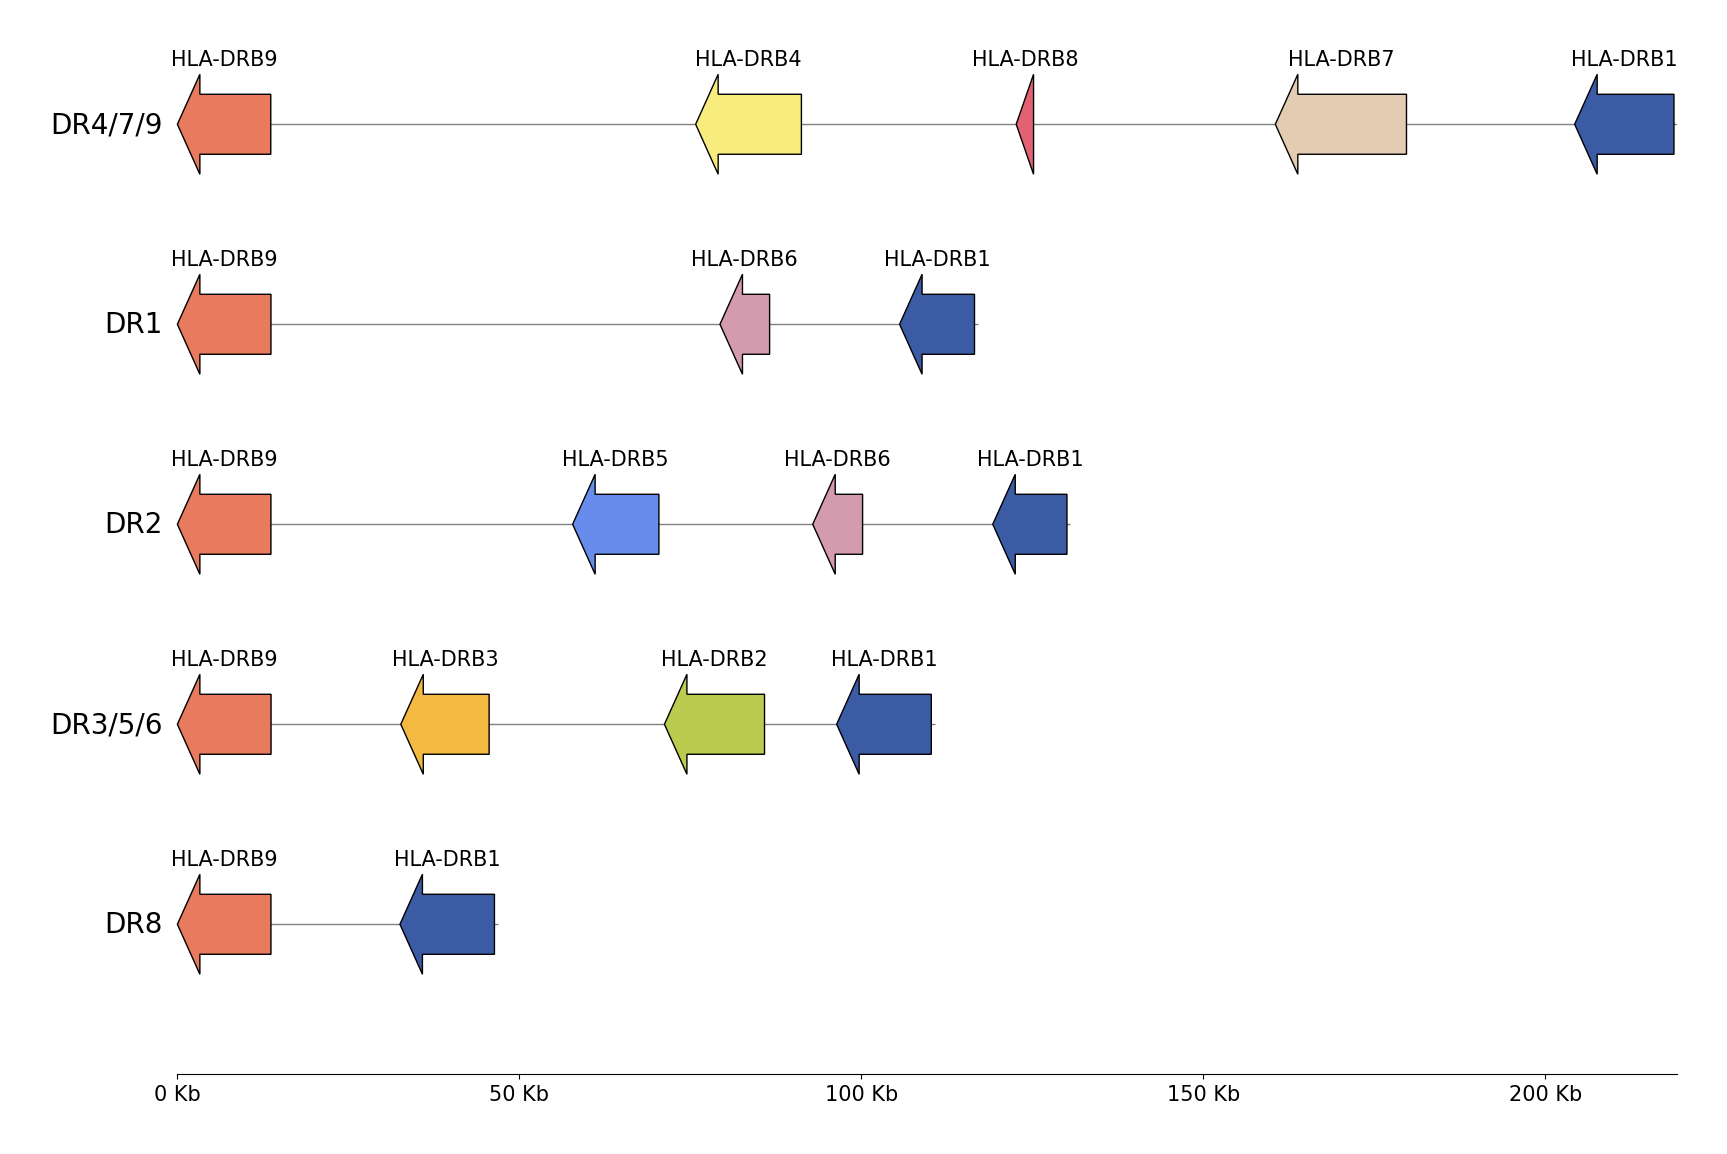

In [112]:
genome_list = []

for sample in randomSamples:
    #print(sample)
    tempDF = DRB_DF[(DRB_DF[5]==sample) & (DRB_DF[11].str.contains("HLA-DRB", regex=True))].copy()
    startCoordinate = min(tempDF[6])
    segmentLength = max(tempDF[7])-startCoordinate
    
    tempList=[]
    for gene in set(tempDF[11]):
        tempDF2 = tempDF[tempDF[11]==gene].copy()
        tempDF2.sort_values(by=[6], inplace=True)

    
        if gene == 'HLA-DRB9':
            if len(tempDF2)>2:
                tempDF2 = tempDF2.head(2)
                tempList.append([gene, min(tempDF2[6])-startCoordinate, max(tempDF2[7])-startCoordinate, -1, colorDict[gene]])

            else:
                tempList.append([gene, min(tempDF2[6])-startCoordinate, max(tempDF2[7])-startCoordinate, -1, colorDict[gene]])

        else:
            tempList.append([gene, min(tempDF2[6])-startCoordinate, max(tempDF2[7])-startCoordinate, -1, colorDict[gene]])
        
    tempDF3 = pd.DataFrame(data=tempList, columns=['Gene', 'Start', 'End', 'Orientation', 'Color'])
    #print(collections.Counter(tempDF3['Gene']))
    #sampleDictHap.append([sample,'_'.join(sorted([x for x in tempDF3['Gene']]))])
    tempDF3.drop_duplicates(subset=['Gene'], inplace=True)
    tempDF3.sort_values(by=['Start'], inplace=True)
    genome_list.append({'name':randomSamplesDict[sample], 'size':max(tempDF3["End"])+500, 'cds_list':[[x,y,z] for x,y,z in zip(tempDF3['Start'], tempDF3['End'], tempDF3['Orientation'])], 'GeneNames':[x for x in tempDF3['Gene']], 'Colors':[x for x in tempDF3['Color']]})

gv = GenomeViz(tick_style="axis")
for genome in genome_list:
    name, size, cds_list, geneName, color = genome["name"], genome["size"], genome["cds_list"], genome['GeneNames'], genome['Colors']
    track = gv.add_feature_track(name, size)
    for idx, cds in enumerate(cds_list, 1):
        start, end, strand = cds
        track.add_feature(start, end, strand, arrow_shaft_ratio=.6, label=geneName[idx-1], linewidth=1, labelrotation=0, labelvpos="top", labelhpos="center", labelha="center", facecolor=color[idx-1])
        
        
fig = gv.plotfig()
fig.subplots_adjust(wspace=0, hspace=1)
#fig.savefig("/home/mark/Desktop/HLA/DRB/Figures/DRB_Architecture_Simplified.svg")
#fig.savefig("/home/mark/Desktop/HLA/DRB/Figures/DRB_Architecture_Simplified.pdf")
#fig.savefig("/home/mark/Desktop/HLA/DRB/Figures/DRB_Architecture_Simplified.jpeg")

In [113]:
metaDataDict = {x:y for x,y in zip(metaData['sample'], metaData['supergroup'])}

In [114]:
metaDataDict['NA19239']='AFR'

In [115]:
sampleHapDF = pd.DataFrame(data=sampleDictHap, columns=['Sample','DR_Haplotype'])

In [116]:
sampleHapDF['SampleName']=[x.split(".hap")[0] for x in sampleHapDF['Sample']]

In [117]:
goodSampleDF = sampleHapDF[sampleHapDF['SampleName'].isin(metaDataDict.keys())].copy()

In [119]:
goodSampleDF['Color']=[ColorDict[metaDataDict[x]] for x in goodSampleDF['SampleName']]
goodSampleDF['SuperGroup']=[metaDataDict[x] for x in goodSampleDF['SampleName']]
finalDRHapDF = goodSampleDF[goodSampleDF['DR_Haplotype']!='HLA-DRB1'].copy()

In [120]:
haplogroupDict ={'HLA-DRB1_HLA-DRB2_HLA-DRB3_HLA-DRB9': 'DR3/5/6',
         'HLA-DRB1_HLA-DRB4_HLA-DRB7_HLA-DRB8_HLA-DRB9': 'DR4/7/9',
         'HLA-DRB1_HLA-DRB5_HLA-DRB6_HLA-DRB9': 'DR2',
         'HLA-DRB1_HLA-DRB9': 'DR8',
         'HLA-DRB1_HLA-DRB6_HLA-DRB9': 'DR1'}

In [121]:
finalDRHapDF.replace({"DR_Haplotype": haplogroupDict}, inplace=True)

In [122]:
drbhaplist=[[x,y] for x,y in collections.Counter(finalDRHapDF['DR_Haplotype']).items()]
drbhapDF = pd.DataFrame(data=drbhaplist, columns=['DR Haplotype','Count'])

In [123]:
hapList=[]
for sample in set(finalDRHapDF['SampleName']):
    tempDF = finalDRHapDF[finalDRHapDF['SampleName']==sample].copy()
    haps = sorted([x for x in tempDF['DR_Haplotype']])
    hapList.append(':'.join(haps))
hapList2 =[]
for x,y in collections.Counter(hapList).items():
    hapList2.append([x,y])
hapDF = pd.DataFrame(data=hapList2, columns=['Diploid DR Haplotype Combination','Count']).sort_values(by=['Count'], ascending=False)

In [124]:
finalDRHapDF[finalDRHapDF['SampleName']=='HG00512']

Sample DR_Haplotype SampleName    Color SuperGroup
28  HG00512.hap1          DR8    HG00512  #acff33        EAS
94  HG00512.hap2          DR2    HG00512  #acff33        EAS

In [176]:
import altair as alt
alt.Chart(hapDF).mark_bar().encode(
    x=alt.X('Count', axis=alt.Axis(labelAngle=0), title='Sample Count'),
    y=alt.Y('Diploid DR Haplotype Combination', title='Diploid Combinations', sort=[x for x in hapDF.index]),
).properties(
    width=350,
    height=350,
    padding={"left": 20, "top": 20, "right": 20, "bottom": 20}
)

alt.Chart(...)

In [126]:
drbhapDF

DR Haplotype  Count
0      DR3/5/6     58
1          DR2     18
2      DR4/7/9     33
3          DR8     10
4          DR1      9

In [127]:
58+18+33+10+9

128

In [128]:
import altair as alt


alt.Chart(drbhapDF).mark_arc().encode(
    theta="Count",
    color="DR Haplotype"
).properties(title='DR Haplotype Proportion')

alt.Chart(...)

In [167]:
ColorListShort=['#ffcd33', '#ff9900','#ff3c3c', '#acff33', '#63ebff', '#ff2fff']
ColorListShort2=['#ffcd33','#ff3c3c', '#acff33', '#63ebff', '#ff2fff']

ColorListShort3=['#ffcd33', '#ff3c3c', '#63ebff', '#ff2fff']

In [151]:
ColorDict={'AFR':'#ffcd33', 'AFRAMR':'#ff9900', 'AMR':'#ff3c3c', 'EAS':'#acff33', 'EUR':'#63ebff', 'SAS':'#ff2fff'}

In [152]:
dr2list = [[x,y] for x,y in collections.Counter(finalDRHapDF[finalDRHapDF['DR_Haplotype']=='DR2']['SuperGroup']).items()]
dr2DF = pd.DataFrame(data=dr2list, columns=['SuperGroup', 'Count'])
dr2DF['Color']=[ColorDict[x] for x in dr2DF['SuperGroup']]
alt.Chart(dr2DF).mark_arc().encode(
    theta="Count",
    #color="SuperGroup"
    color=alt.Color('SuperGroup', scale=alt.Scale(range=ColorListShort))
).properties(title='DR2 Haplotype SuperGroup Proportion')

alt.Chart(...)

In [153]:
dr2DF

SuperGroup  Count    Color
0        EAS      3  #acff33
1        AFR      7  #ffcd33
2        AMR      1  #ff3c3c
3     AFRAMR      2  #ff9900
4        EUR      3  #63ebff
5        SAS      2  #ff2fff

In [154]:
dr2 = dr2DF.copy()
dr2['Haplotype']='DR2'

In [155]:
dr4list = [[x,y] for x,y in collections.Counter(finalDRHapDF[finalDRHapDF['DR_Haplotype']=='DR4/7/9']['SuperGroup']).items()]
dr4DF = pd.DataFrame(data=dr4list, columns=['SuperGroup', 'Count'])
dr4DF['Color']=[ColorDict[x] for x in dr2DF['SuperGroup']]
alt.Chart(dr4DF).mark_arc().encode(
    theta="Count",
    #color="SuperGroup"
    color=alt.Color('SuperGroup', scale=alt.Scale(range=ColorListShort))
).properties(title='DR4/7/9 Haplotype SuperGroup Proportion')

alt.Chart(...)

In [156]:
dr4 = dr4DF.copy()
dr4['Haplotype']='DR4/7/9'

In [157]:
dr3list = [[x,y] for x,y in collections.Counter(finalDRHapDF[finalDRHapDF['DR_Haplotype']=='DR3/5/6']['SuperGroup']).items()]
dr3DF = pd.DataFrame(data=dr3list, columns=['SuperGroup', 'Count'])
dr3DF['Color']=[ColorDict[x] for x in dr3DF['SuperGroup']]
alt.Chart(dr3DF).mark_arc().encode(
    theta="Count",
    #color="SuperGroup"
    color=alt.Color('SuperGroup', scale=alt.Scale(range=ColorListShort))
).properties(title='DR3/5/6 Haplotype SuperGroup Proportion')

alt.Chart(...)

In [158]:
dr3 = dr3DF.copy()
dr3['Haplotype']='DR3/5/6'

In [168]:
dr1list = [[x,y] for x,y in collections.Counter(finalDRHapDF[finalDRHapDF['DR_Haplotype']=='DR1']['SuperGroup']).items()]
dr1DF = pd.DataFrame(data=dr1list, columns=['SuperGroup', 'Count'])
dr1DF['Color']=[ColorDict[x] for x in dr1DF['SuperGroup']]
alt.Chart(dr1DF).mark_arc().encode(
    theta="Count",
    #color="SuperGroup"
    color=alt.Color('SuperGroup', scale=alt.Scale(range=ColorListShort2))
).properties(title='DR1 Haplotype SuperGroup Proportion')

alt.Chart(...)

In [160]:
dr1 = dr1DF.copy()
dr1['Haplotype']='DR1'

In [169]:
dr8list = [[x,y] for x,y in collections.Counter(finalDRHapDF[finalDRHapDF['DR_Haplotype']=='DR8']['SuperGroup']).items()]
dr8DF = pd.DataFrame(data=dr8list, columns=['SuperGroup', 'Count'])
dr8DF['Color']=[ColorDict[x] for x in dr8DF['SuperGroup']]
alt.Chart(dr8DF).mark_arc().encode(
    theta="Count",
    #color="SuperGroup"
    color=alt.Color('SuperGroup', scale=alt.Scale(range=ColorListShort2))
).properties(title='DR8 Haplotype SuperGroup Proportion')

alt.Chart(...)

In [162]:
dr8 = dr8DF.copy()
dr8['Haplotype']='DR8'

In [163]:
combinedList = [dr4,dr1,dr2,dr3,dr8]
combinedDF = pd.concat(combinedList).reset_index()
combinedDF2 = combinedDF.copy()

In [164]:
for row in combinedDF.index:
    hap = str(combinedDF.at[row,'Haplotype'])
    #print(hap)
    tempDF = combinedDF[combinedDF['Haplotype']==hap].copy()
    combinedDF2.at[row,'Count'] = int(combinedDF.at[row,'Count'])/sum(tempDF['Count'])

In [165]:
combinedDF2

index SuperGroup     Count    Color Haplotype
0       0        AFR  0.212121  #acff33   DR4/7/9
1       1        EUR  0.272727  #ffcd33   DR4/7/9
2       2        SAS  0.181818  #ff3c3c   DR4/7/9
3       3     AFRAMR  0.030303  #ff9900   DR4/7/9
4       4        AMR  0.212121  #63ebff   DR4/7/9
5       5        EAS  0.090909  #ff2fff   DR4/7/9
6       0        EUR  0.222222  #63ebff       DR1
7       1     AFRAMR  0.333333  #ff9900       DR1
8       2        AMR  0.111111  #ff3c3c       DR1
9       3        SAS  0.111111  #ff2fff       DR1
10      4        AFR  0.222222  #ffcd33       DR1
11      0        EAS  0.166667  #acff33       DR2
12      1        AFR  0.388889  #ffcd33       DR2
13      2        AMR  0.055556  #ff3c3c       DR2
14      3     AFRAMR  0.111111  #ff9900       DR2
15      4        EUR  0.166667  #63ebff       DR2
16      5        SAS  0.111111  #ff2fff       DR2
17      0        AFR  0.500000  #ffcd33   DR3/5/6
18      1     AFRAMR  0.137931  #ff9900   DR3/5/6
19      2        AMR  0.137931  #ff3c3c   DR3/5/6
20      3        EAS  0.103448  #acff33   DR3/5/6
21      4        SAS  0.103448  #ff2fff   DR3/5/6
22      5        EUR  0.017241  #63ebff   DR3/5/6
23      0        EAS  0.600000  #acff33       DR8
24      1        AFR  0.100000  #ffcd33       DR8
25      2        AMR  0.100000  #ff3c3c       DR8
26      3        EUR  0.100000  #63ebff       DR8
27      4        SAS  0.100000  #ff2fff       DR8

In [170]:
import altair as alt
sorter2=['DR4/7/9' , 'DR1', 'DR2', 'DR3/5/6','DR8']
alt.Chart(combinedDF2).mark_bar().encode(
    x=alt.X('Haplotype', sort=sorter2, axis=alt.Axis(labelAngle=0), title='DR Haplotypes'),
    y=alt.Y('Count', title='SuperGroup Proportions'),
    color=alt.Color('SuperGroup', scale=alt.Scale(range=['#ffcd33','#ff9900', '#ff3c3c','#acff33', '#63ebff', '#ff2fff'])),
).properties(
    width=350,
    height=350,
    padding={"left": 20, "top": 20, "right": 20, "bottom": 20}
)

alt.Chart(...)